# 장애인콜택시 대기시간 예측
## 단계3. 모델링

## 0.미션

* 1.시계열 데이터에 맞는 전처리
    * 데이터가 2015 ~ 2022년까지 데이터 입니다.
    * 이 중 2022년 10월 ~ 2022년 12월까지(3개월)의 데이터는 성능 검증용으로 사용합니다.
    * 나머지 데이터를 이용하여 학습 및 튜닝을 수행합니다.
    * 이를 위한 데이터 전처리를 수행하시오.
* 2.모델 최적화
    * 머신러닝
        * 알고리즘 중 3가지 이상을 선정하여 모델링을 수행합니다.
        * 각각 알고리즘에 맞는 튜닝 방법으로 최적의 모델을 만듭니다.
    
    * 성능 평가
        * 시계열 그래프로 모델의 실제값과 예측값을 시각화하여 비교합니다.
        * 성능 지표 (MAE, MAPE) 를 사용해 가장 성능이 높은 모델을 선정합니다.
        * 성능 가이드
            * MAE : 4 ~ 6
            * MAPE : 0.09~0.14

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고,
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1]:
# path = 'C:/Users/User/project/'

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [2]:
# colab 그래프 한글화 코드
# jupyter 사용시 코드 주석처리 할 것.
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
# 모든 경고 무시
warnings.filterwarnings("ignore")
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# warnings.simplefilter(action='ignore', category=UserWarning)

# plt.rc('font', family='NanumBarunGothic')
# mpl.rcParams['axes.unicode_minus'] = False

# # colab - drive 연동
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# path = '/content/drive/MyDrive/kt_aivle/8_mini_proj_2/day_2_실습/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [4]:
# !pip install -r requirements.txt

#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

### (3) 데이터 불러오기
* 주어진 데이터셋
    * [2.탐색적 데이터분석] 단계에서 저장한 파일 : data2.pkl


In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

df = joblib.load('data2_team.pkl')

In [7]:
df

,Date,count_taxi,receipt,boarding,avg_rate,avg_ride_distance,target,temp_max,temp_min,rain(mm),...,season,year,weekend,covid_19,holiday,day7_avg_wait_time,ride_ratio,temp_avg,humidity_avg,weekend_holiday
0,2015-01-01,213,1023,924,2427,10764,17.2,-2.0,-8.9,0.0,...,Winter,2015,0,0,1.0,17.200000,0.90,-5.4,45.5,1.0
1,2015-01-02,420,3158,2839,2216,8611,26.2,2.4,-9.2,0.0,...,Winter,2015,0,0,0.0,21.700000,0.90,-3.4,55.0,0.0
2,2015-01-03,209,1648,1514,2377,10198,24.5,8.2,0.2,0.0,...,Winter,2015,1,0,0.0,22.633333,0.92,4.2,73.5,1.0
3,2015-01-04,196,1646,1526,2431,10955,26.2,7.9,-0.9,0.0,...,Winter,2015,1,0,0.0,23.525000,0.93,3.5,73.5,1.0
4,2015-01-05,421,4250,3730,2214,8663,23.6,4.1,-7.4,3.4,...,Winter,2015,0,0,0.0,23.540000,0.88,-1.7,63.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2022-12-26,603,5555,4605,2163,7889,44.4,3.0,-7.3,0.0,...,Winter,2022,0,0,0.0,42.771429,0.83,-2.2,68.5,0.0
2918,2022-12-27,669,5635,4654,2198,8178,44.8,-0.3,-5.4,0.1,...,Winter,2022,0,0,0.0,43.514286,0.83,-2.8,66.0,0.0
2919,2022-12-28,607,5654,4648,2161,7882,52.5,1.7,-7.8,0.0,...,Winter,2022,0,0,0.0,42.957143,0.82,-3.0,52.5,0.0
2920,2022-12-29,581,5250,4247,2229,8433,38.3,2.1,-4.0,0.0,...,Winter,2022,0,0,0.0,41.042857,0.81,-1.0,62.5,0.0


In [8]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                2922 non-null   datetime64[ns]
 1   count_taxi          2922 non-null   int64         
 2   receipt             2922 non-null   int64         
 3   boarding            2922 non-null   int64         
 4   avg_rate            2922 non-null   int64         
 5   avg_ride_distance   2922 non-null   int64         
 6   target              2922 non-null   float64       
 7   temp_max            2922 non-null   float64       
 8   temp_min            2922 non-null   float64       
 9   rain(mm)            2922 non-null   float64       
 10  humidity_max(%)     2922 non-null   float64       
 11  humidity_min(%)     2922 non-null   float64       
 12  sunshine(MJ/m2)     2922 non-null   float64       
 13  weekday             2922 non-null   category    

In [9]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

df.head()

,Date,count_taxi,receipt,boarding,avg_rate,avg_ride_distance,target,temp_max,temp_min,rain(mm),...,season,year,weekend,covid_19,holiday,day7_avg_wait_time,ride_ratio,temp_avg,humidity_avg,weekend_holiday
0,2015-01-01,213,1023,924,2427,10764,17.2,-2.0,-8.9,0.0,...,Winter,2015,0,0,1.0,17.200000,0.90,-5.4,45.5,1.0
1,2015-01-02,420,3158,2839,2216,8611,26.2,2.4,-9.2,0.0,...,Winter,2015,0,0,0.0,21.700000,0.90,-3.4,55.0,0.0
2,2015-01-03,209,1648,1514,2377,10198,24.5,8.2,0.2,0.0,...,Winter,2015,1,0,0.0,22.633333,0.92,4.2,73.5,1.0
3,2015-01-04,196,1646,1526,2431,10955,26.2,7.9,-0.9,0.0,...,Winter,2015,1,0,0.0,23.525000,0.93,3.5,73.5,1.0
4,2015-01-05,421,4250,3730,2214,8663,23.6,4.1,-7.4,3.4,...,Winter,2015,0,0,0.0,23.540000,0.88,-1.7,63.5,0.0


In [10]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



## 2.데이터 준비
* **세부요구사항**
    * NaN에 대한 조치를 수행하시오.
        * rolling 혹은 shift로 발생된 초기 행의 NaN은 삭제해도 무방합니다.
    * 가변수화 : 범주형에 대해서 가변수화를 수행합니다.
    * 데이터분할
        * 시계열 데이터 특성에 맞게 분할합니다.
        * 마지막 91일(3개월) 데이터를 검증셋으로 사용합니다.

### (1) NA 조치

In [11]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

df.isna().sum()

Date                  0
count_taxi            0
receipt               0
boarding              0
avg_rate              0
avg_ride_distance     0
target                0
temp_max              0
temp_min              0
rain(mm)              0
humidity_max(%)       0
humidity_min(%)       0
sunshine(MJ/m2)       0
weekday               0
month                 0
season                0
year                  0
weekend               0
covid_19              0
holiday               0
day7_avg_wait_time    0
ride_ratio            0
temp_avg              0
humidity_avg          0
weekend_holiday       0
dtype: int64

### (2) 가변수화

In [14]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                2922 non-null   datetime64[ns]
 1   count_taxi          2922 non-null   int64         
 2   receipt             2922 non-null   int64         
 3   boarding            2922 non-null   int64         
 4   avg_rate            2922 non-null   int64         
 5   avg_ride_distance   2922 non-null   int64         
 6   target              2922 non-null   float64       
 7   temp_max            2922 non-null   float64       
 8   temp_min            2922 non-null   float64       
 9   rain(mm)            2922 non-null   float64       
 10  humidity_max(%)     2922 non-null   float64       
 11  humidity_min(%)     2922 non-null   float64       
 12  sunshine(MJ/m2)     2922 non-null   float64       
 13  weekday             2922 non-null   category    

In [15]:
df.head(3).T

,0,1,2
Date,2015-01-01 00:00:00,2015-01-02 00:00:00,2015-01-03 00:00:00
count_taxi,213,420,209
receipt,1023,3158,1648
boarding,924,2839,1514
avg_rate,2427,2216,2377
avg_ride_distance,10764,8611,10198
target,17.2,26.2,24.5
temp_max,-2.0,2.4,8.2
temp_min,-8.9,-9.2,0.2
rain(mm),0.0,0.0,0.0


In [16]:
df = pd.get_dummies(data = df, columns = ['weekday', 'season'])

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# df.loc[:, 'year'] = le.fit_transform(df.loc[:, 'year'])


### (3) 데이터분할
* **세부요구사항**
    * 마지막 91일 간의 데이터를 검증 셋으로 만듭니다. (2022-10-01 ~ )
    * 이 기간의 날짜 리스트를 별도로 저장하여, 모델 검증시 시각화할 때 활용합니다.

In [17]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

df.head().T

,0,1,2,3,4
Date,2015-01-01 00:00:00,2015-01-02 00:00:00,2015-01-03 00:00:00,2015-01-04 00:00:00,2015-01-05 00:00:00
count_taxi,213,420,209,196,421
receipt,1023,3158,1648,1646,4250
boarding,924,2839,1514,1526,3730
avg_rate,2427,2216,2377,2431,2214
avg_ride_distance,10764,8611,10198,10955,8663
target,17.2,26.2,24.5,26.2,23.6
temp_max,-2.0,2.4,8.2,7.9,4.1
temp_min,-8.9,-9.2,0.2,-0.9,-7.4
rain(mm),0.0,0.0,0.0,0.0,3.4


In [18]:
df.columns

Index(['Date', 'count_taxi', 'receipt', 'boarding', 'avg_rate',
       'avg_ride_distance', 'target', 'temp_max', 'temp_min', 'rain(mm)',
       'humidity_max(%)', 'humidity_min(%)', 'sunshine(MJ/m2)', 'month',
       'year', 'weekend', 'covid_19', 'holiday', 'day7_avg_wait_time',
       'ride_ratio', 'temp_avg', 'humidity_avg', 'weekend_holiday',
       'weekday_Monday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weekday_Thursday', 'weekday_Friday', 'weekday_Saturday',
       'weekday_Sunday', 'season_Spring', 'season_Summer', 'season_Fall',
       'season_Winter'],
      dtype='object')

### 강우량 자세히 보기

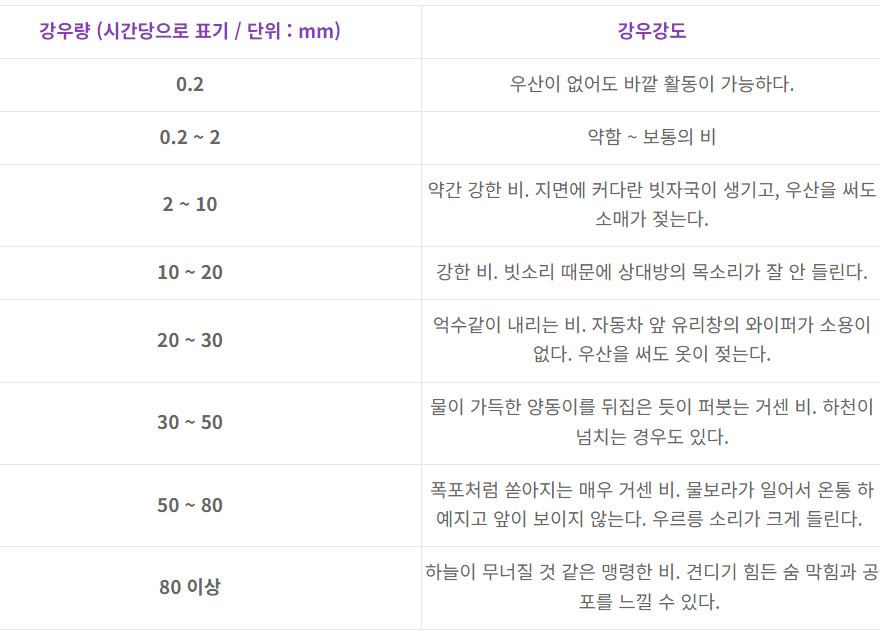![image.png](
)

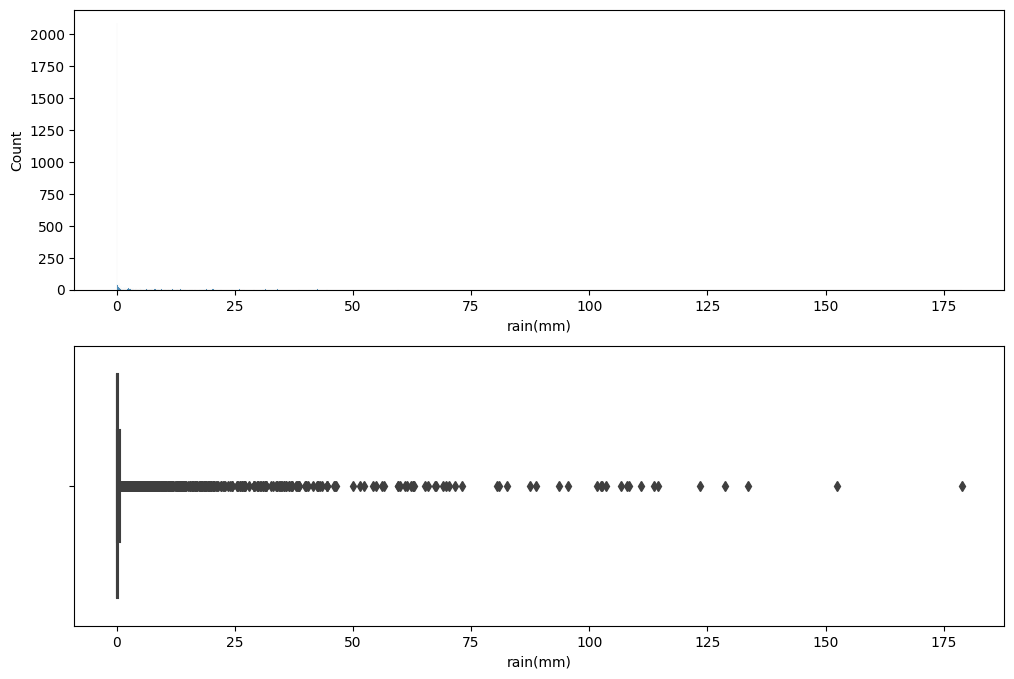

In [19]:
plt.figure(figsize = (12, 8))
plt.subplot(2, 1, 1)
sns.histplot(data = df, x = 'rain(mm)')

plt.subplot(2, 1, 2)
sns.boxplot(data = df, x = 'rain(mm)')

plt.show()

- 2이상이면 비가 온다고 생각

In [20]:
df[df['rain(mm)'] > 2]

,Date,count_taxi,receipt,boarding,avg_rate,avg_ride_distance,target,temp_max,temp_min,rain(mm),...,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,weekday_Sunday,season_Spring,season_Summer,season_Fall,season_Winter
4,2015-01-05,421,4250,3730,2214,8663,23.6,4.1,-7.4,3.4,...,False,False,False,False,False,False,False,False,False,True
16,2015-01-17,219,1913,1728,2376,10192,33.8,1.9,-6.4,2.5,...,False,False,False,False,True,False,False,False,False,True
45,2015-02-15,198,1647,1554,2394,10620,41.8,7.9,4.8,9.5,...,False,False,False,False,False,True,False,False,False,True
50,2015-02-20,179,1359,1186,2476,11864,19.8,6.7,4.8,6.5,...,False,False,False,True,False,False,False,False,False,True
51,2015-02-21,211,1447,1322,2308,9637,22.2,6.9,-0.3,4.0,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2888,2022-11-27,258,1952,1649,2456,10525,47.0,15.0,7.5,10.0,...,False,False,False,False,False,True,False,False,True,False
2889,2022-11-28,648,5887,4822,2189,8072,42.6,15.0,-0.8,13.3,...,False,False,False,False,False,False,False,False,True,False
2902,2022-12-11,247,1899,1627,2483,10878,46.8,6.2,-2.0,5.4,...,False,False,False,False,False,True,False,False,False,True
2905,2022-12-14,677,5966,4959,2176,7987,40.5,-1.3,-8.5,2.4,...,False,True,False,False,False,False,False,False,False,True


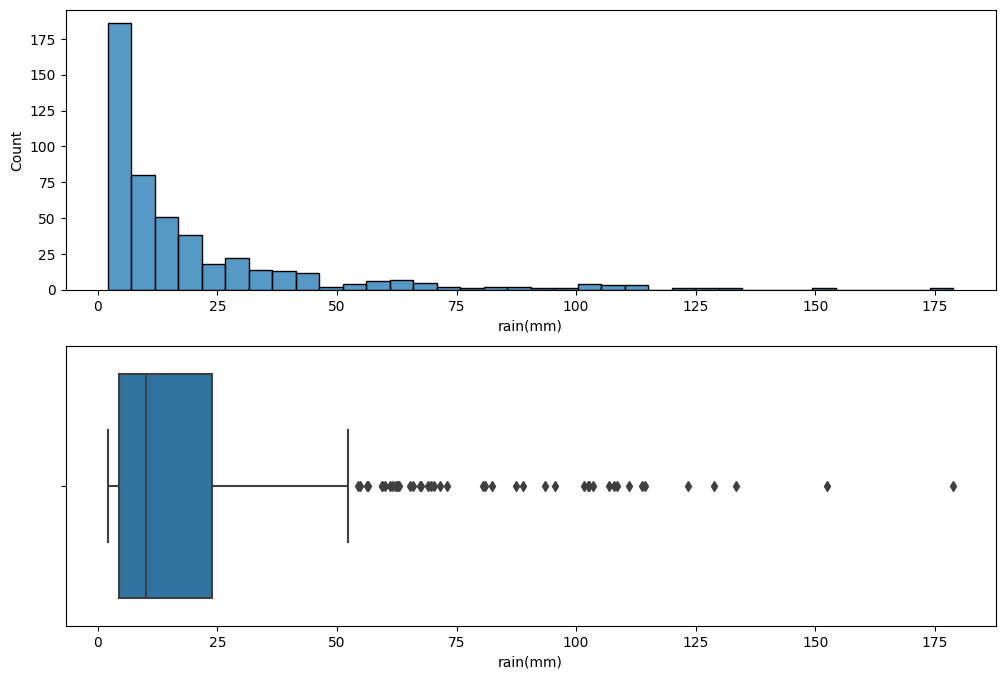

In [21]:
plt.figure(figsize = (12, 8))
plt.subplot(2, 1, 1)
sns.histplot(data = df[df['rain(mm)'] > 2], x = 'rain(mm)')

plt.subplot(2, 1, 2)
sns.boxplot(data = df[df['rain(mm)'] > 2], x = 'rain(mm)')

plt.show()

### Rainy day 파생변수 생성
- rain(mm)이 2이상이면 1 아니면 0으로 rainyday 파생변수 생성

In [22]:
df['rainyday'] = df['rain(mm)'].map(lambda x : 1 if x > 2  else 0)

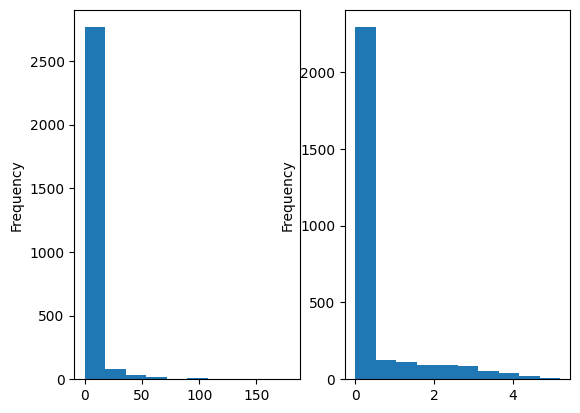

In [23]:
plt.subplot(1, 2, 1)
df['rain(mm)'].plot(kind = 'hist')

plt.subplot(1, 2, 2)
np.log1p(df['rain(mm)']).plot(kind = 'hist')

plt.show()

In [24]:
df['rain(mm)'] = np.log1p(df['rain(mm)'])

### 코로나 추가 분석

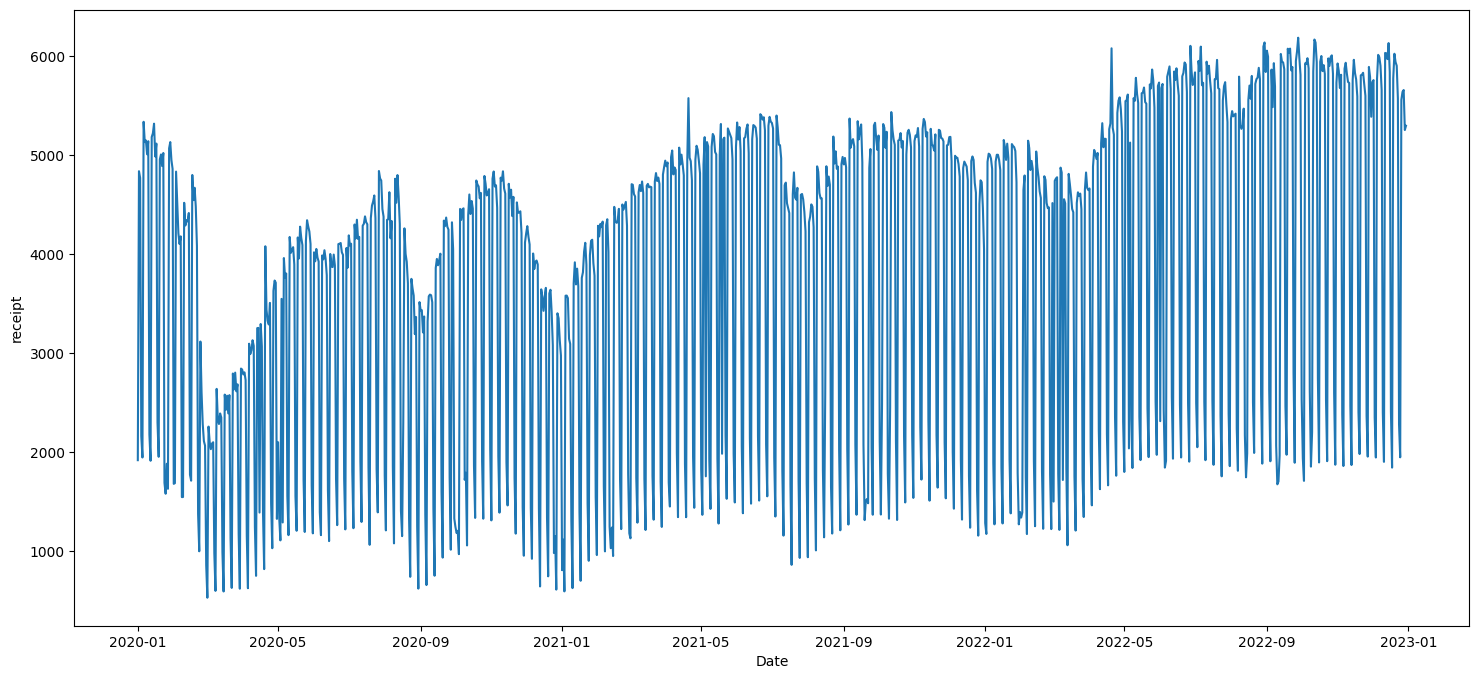

In [25]:
plt.figure(figsize = (18, 8))
sns.lineplot(data = df[df['year'] > 2019], x = 'Date', y = 'receipt')
plt.show()

### 코로나 파생변수 생성
- 코로나 발생 시점 ~ 집합 금지 기간 (2020-01-20~2020-04-19) -> 2
- 집합 금지 해제 ~ 사회적 거리두기 (2020-04-20 ~ 2022-04-18) -> 1
- 코로나 기간이 아닌 기간 -> 0

In [27]:
def covid_step(date):
    result = 0
    if pd.to_datetime('2020-01-20') <= date <= pd.to_datetime('2020-04-19'): # 코로나 발생 시점 ~ 집합 금지
        result = 2
    elif pd.to_datetime('2020-04-20') <= date <= pd.to_datetime('2022-04-18'): # 집합금지 해제 ~ 사회적 거리두기
        result = 1
    else:
        result = 0
    return result

df['covid_19'] = df['Date'].apply(lambda x : covid_step(x))

In [28]:
df['covid_19'].value_counts()

covid_19
0    2102
1     729
2      91
Name: count, dtype: int64

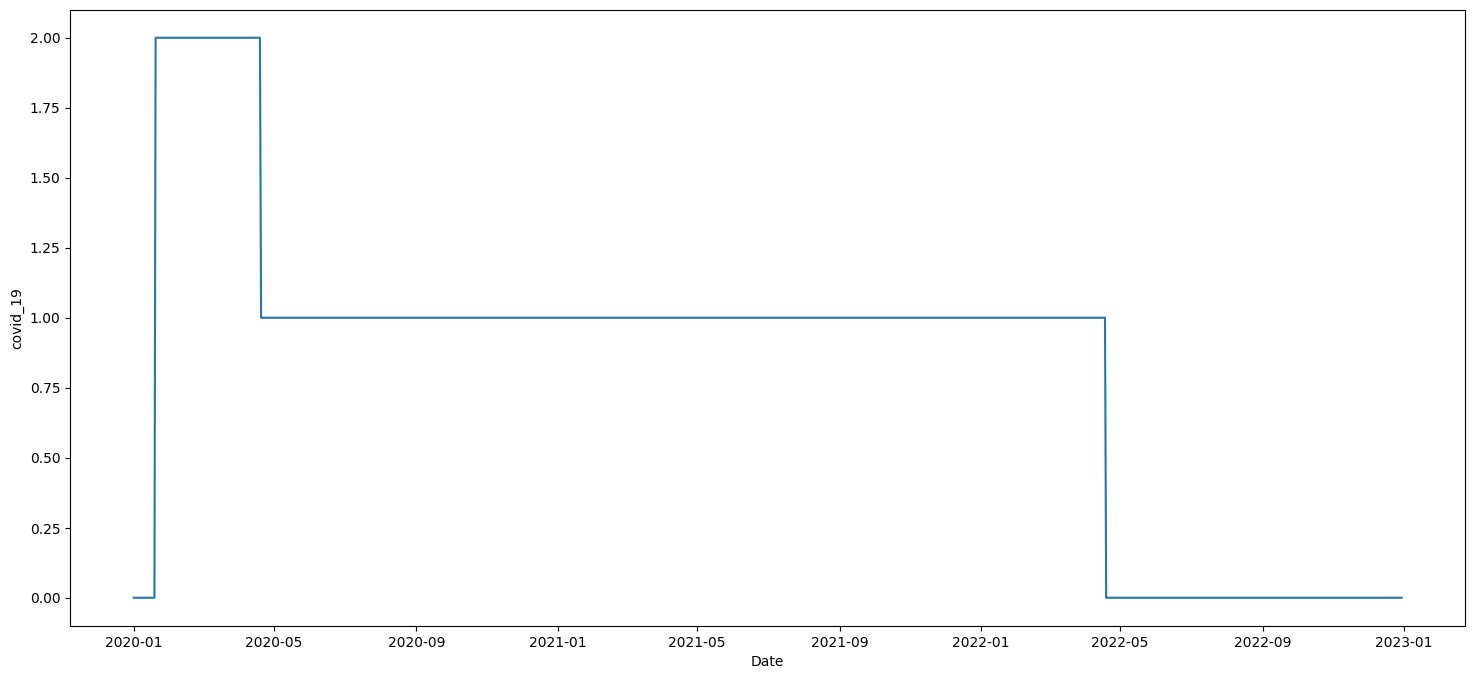

In [64]:
# 코로나 기간내에 코로나 파생변수 시각화
plt.figure(figsize = (18, 8))
sns.lineplot(data = df[df['year'] > 2019], x = 'Date', y = 'covid_19')
plt.show()

#### 1) x, y 나누기

In [30]:
df.set_index('Date', inplace = True)


In [65]:
df.columns

Index(['count_taxi', 'receipt', 'boarding', 'avg_rate', 'avg_ride_distance',
       'target', 'temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)',
       'humidity_min(%)', 'sunshine(MJ/m2)', 'month', 'year', 'weekend',
       'covid_19', 'holiday', 'day7_avg_wait_time', 'ride_ratio', 'temp_avg',
       'humidity_avg', 'weekend_holiday', 'weekday_Monday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weekday_Thursday', 'weekday_Friday',
       'weekday_Saturday', 'weekday_Sunday', 'season_Spring', 'season_Summer',
       'season_Fall', 'season_Winter', 'rainyday'],
      dtype='object')

#### 제외한 컬럼 & 선택한 컬럼

In [32]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# x와 y 분리

x = df.drop(columns = [
            'target', 'temp_max', 'temp_min', 'humidity_max(%)', 'humidity_min(%)', 'sunshine(MJ/m2)',
            'month', 'weekend', 'weekday_Monday', 'weekday_Tuesday',
            'weekday_Wednesday', 'weekday_Thursday', 'weekday_Friday', 'season_Spring', 'season_Summer', 'season_Fall', 'season_Winter'
            ], axis = 1)
y = df.loc[:, 'target']

x에서 제외된 컬럼
> * target : y값
* temp_max, temp_min : 최고온도 + 최저온도 / 2 => temp_avg를 사용
* humidity_max, humidity_min : 최고 온도 + 최저온도 / 2 => humidity_avg를 사용
* sunshine : 일사량 연관 없음
* month : 수치형으로 1-12 까지의 수는 y값과 상관성을 찾지 못하였고, 예측해야하는 10~12(3개월)에 특성을 찾지못하여 제외
* weekend : weekend_holiday 에 90% 이상값으로 제외
* weekday_Monday, weekday_Tuesday, weekday_Wednesday, weekday_Thursday, weekday_Friday : 앞서 시각화에서 평일을 개별로 보았을 시, 유의미한 결과가 존재하지 않아보임
* seaon_** : 계절에 대한 컬럼은 연관이 없어서 제외

x에서 채택된 컬럼
> 'count_taxi', 'receipt', 'boarding', 'avg_rate', 'avg_ride_distance',
       'rain(mm)', 'year', 'covid_19', 'holiday', 'day7_avg_wait_time',
       'ride_ratio', 'temp_avg', 'humidity_avg', 'weekend_holiday',
       'weekday_Saturday', 'weekday_Sunday', 'rainyday'

In [91]:
x.columns

Index(['count_taxi', 'receipt', 'boarding', 'avg_rate', 'avg_ride_distance',
       'rain(mm)', 'year', 'covid_19', 'holiday', 'day7_avg_wait_time',
       'ride_ratio', 'temp_avg', 'humidity_avg', 'weekend_holiday',
       'weekday_Saturday', 'weekday_Sunday', 'rainyday'],
      dtype='object')

#### 2) train : validation 나누기
* 힌트 : train_test_split(  ,   ,  test_size = 91, shuffle = False)

In [34]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 91, random_state = 1, shuffle = False)

### (4) Scaling

In [35]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# MinMaxScaler()

x_train.columns

Index(['count_taxi', 'receipt', 'boarding', 'avg_rate', 'avg_ride_distance',
       'rain(mm)', 'year', 'covid_19', 'holiday', 'day7_avg_wait_time',
       'ride_ratio', 'temp_avg', 'humidity_avg', 'weekend_holiday',
       'weekday_Saturday', 'weekday_Sunday', 'rainyday'],
      dtype='object')

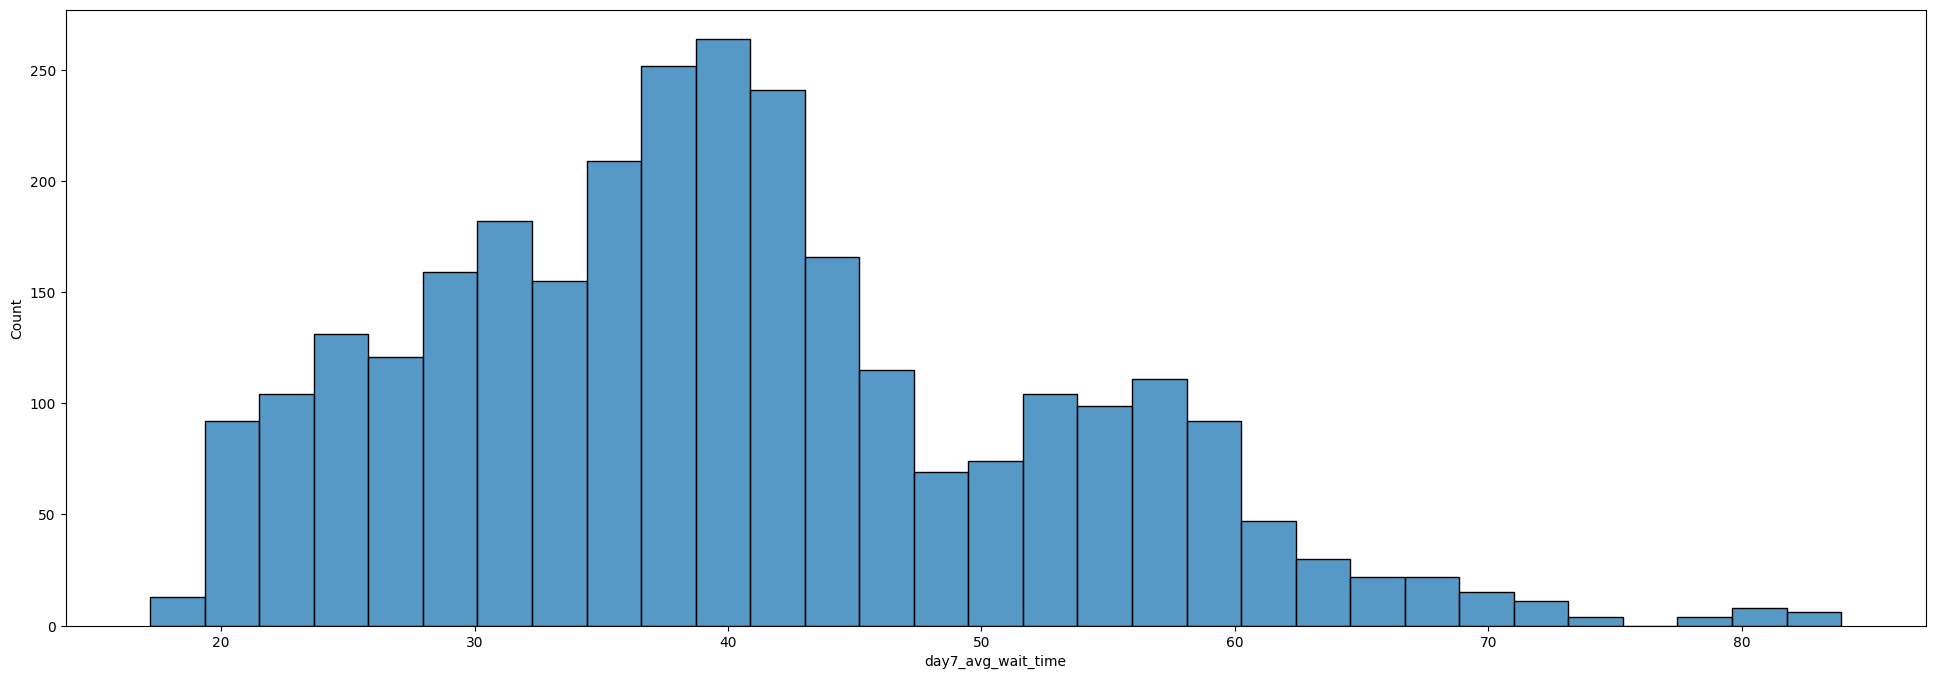

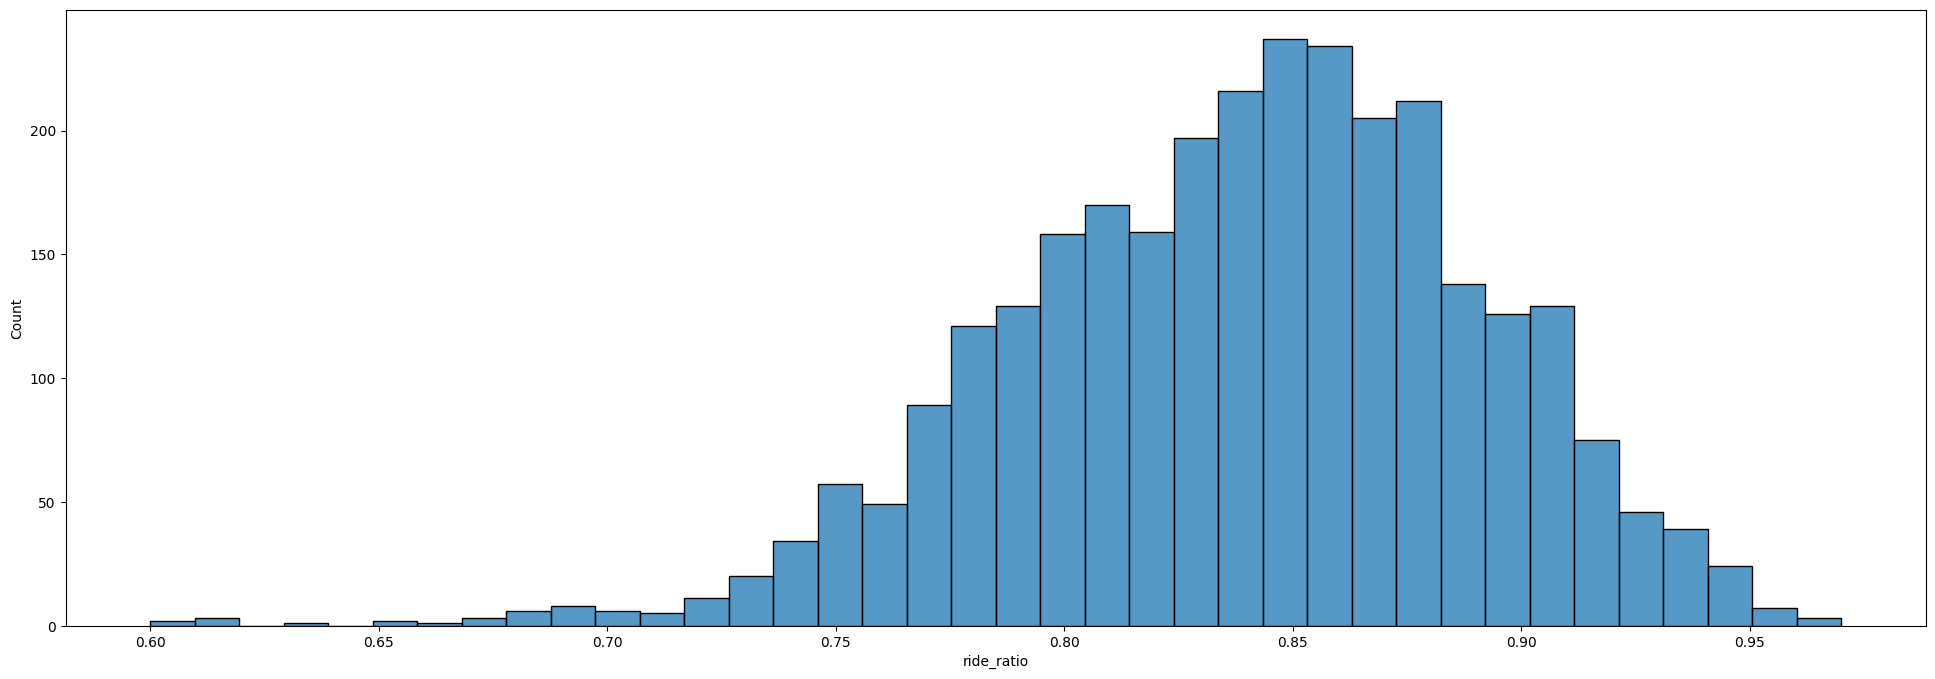

In [36]:
for i in ['day7_avg_wait_time', 'ride_ratio']:
    plt.figure(figsize = (24, 8))
    sns.histplot(data = df, x = i)
    plt.show()

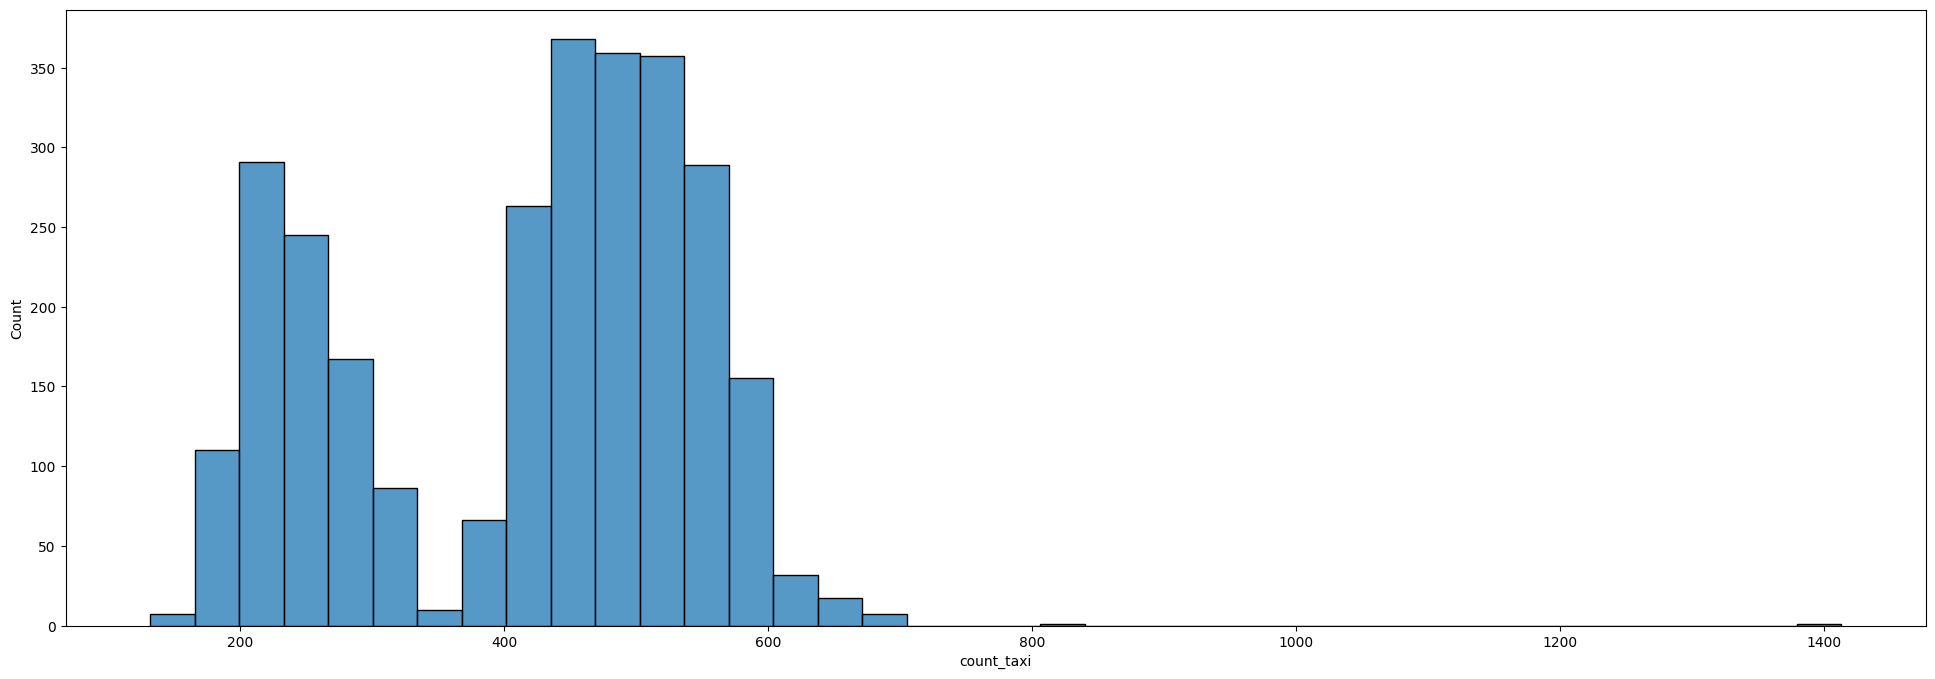

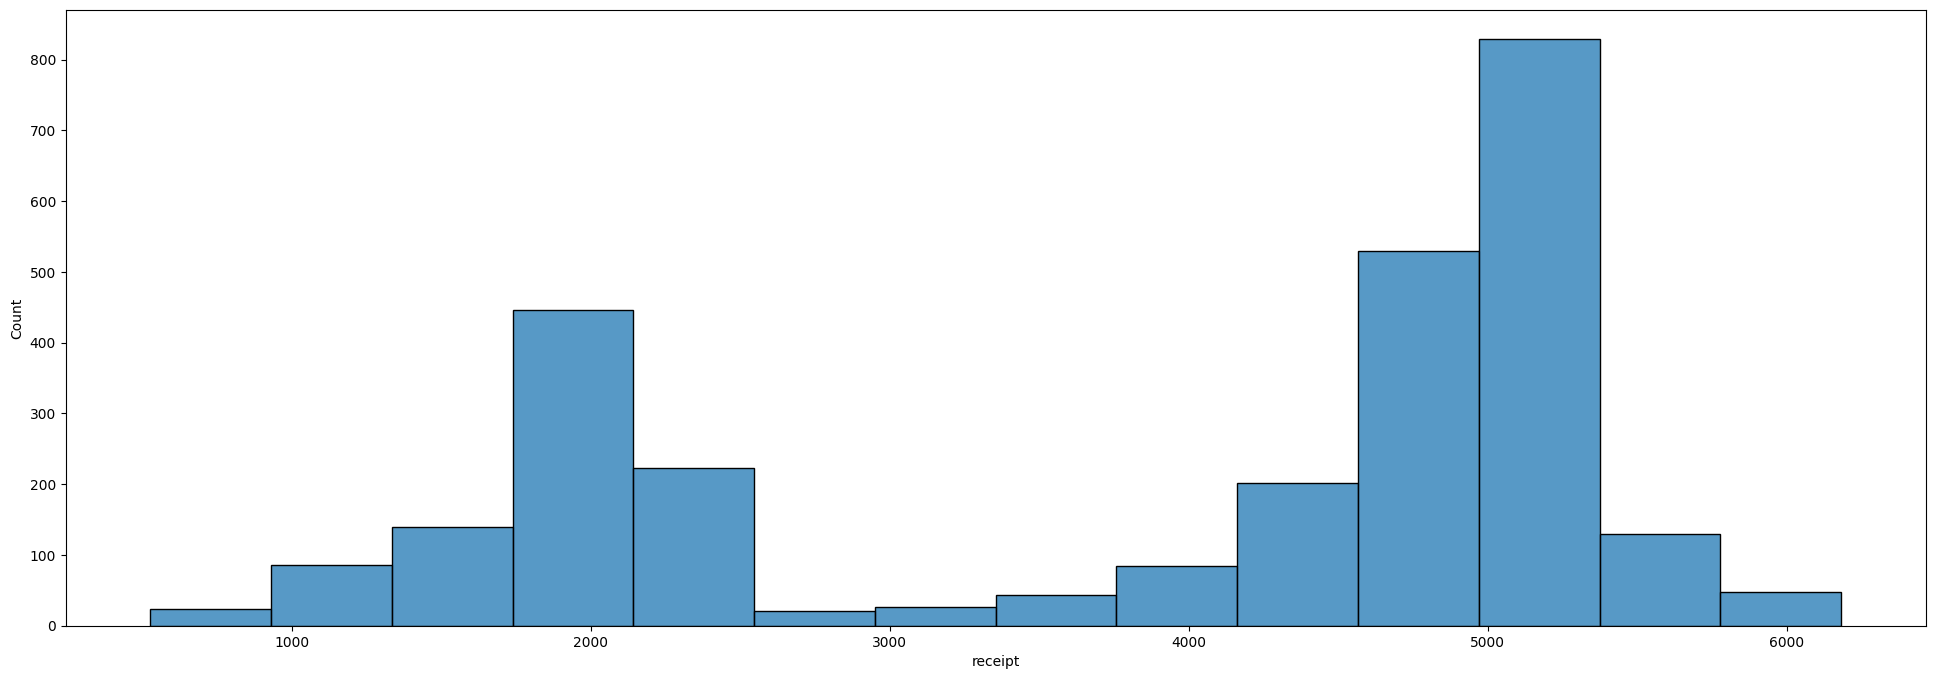

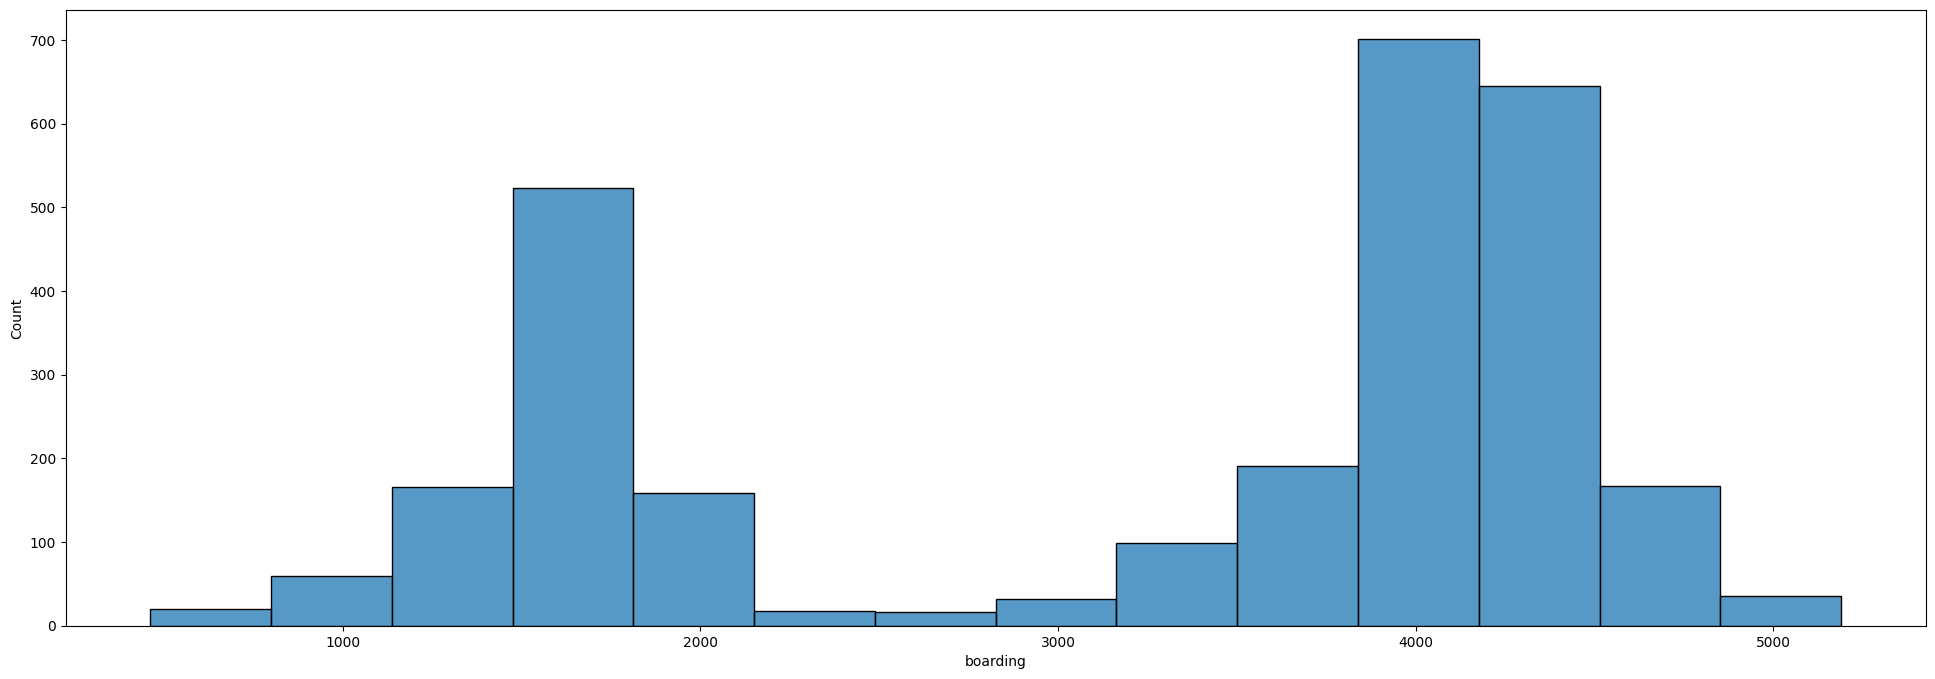

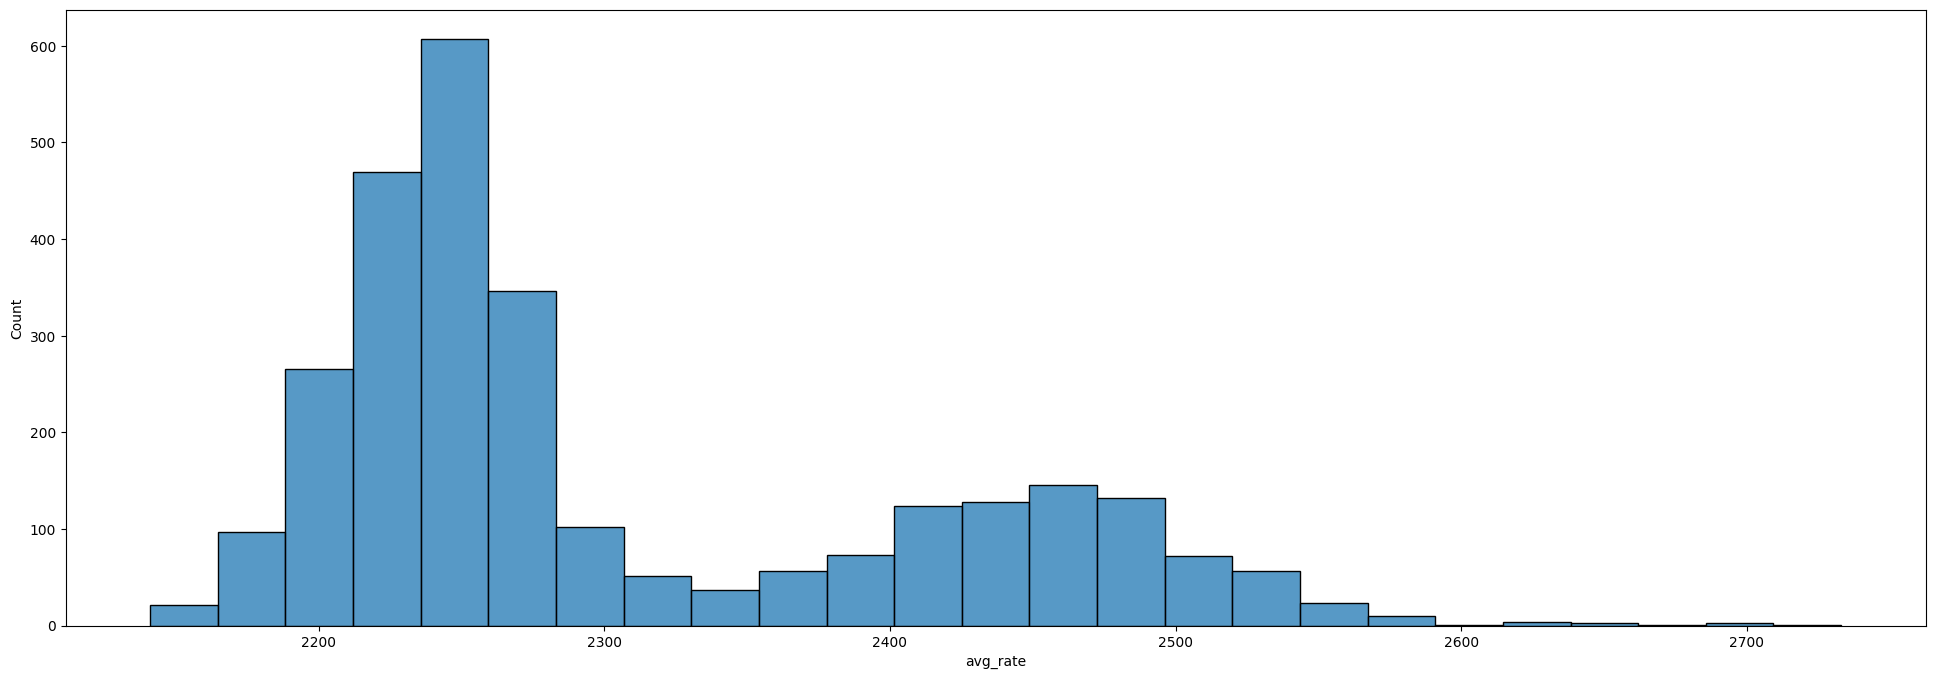

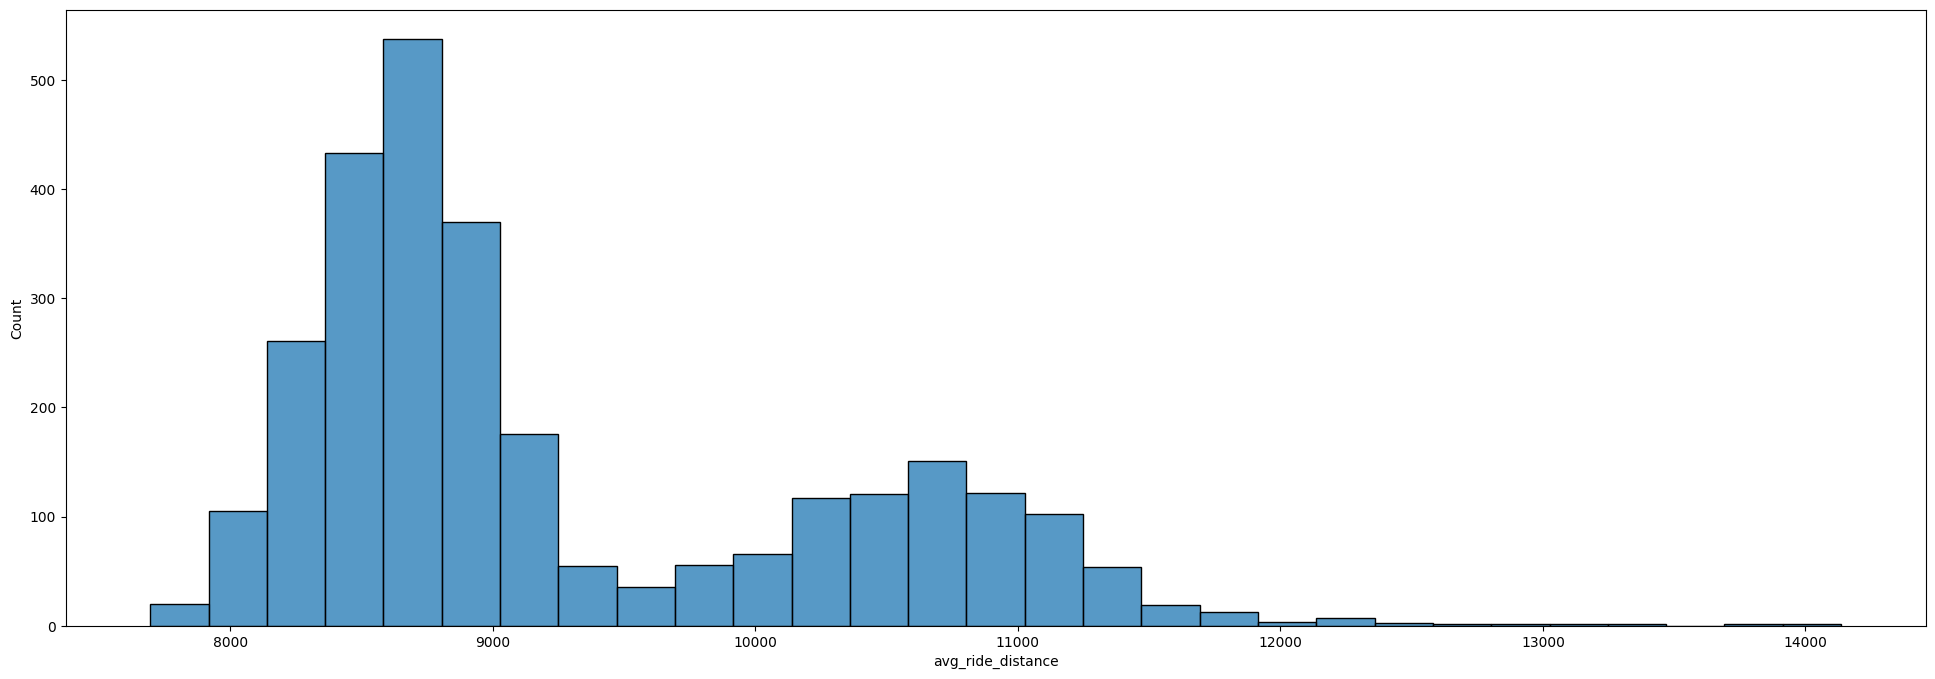

In [37]:
for i in x_train.columns[:5]:
    plt.figure(figsize = (24, 8))
    sns.histplot(data = x_train, x = i)
    plt.show()

In [38]:
# Robust_Scailing : 이상치가 있는 feature에서 좋은 결과를 보여줌
robust_cols = ['avg_ride_distance', 'avg_rate', 'count_taxi']
minmax_cols = ['boarding', 'receipt']

from sklearn.preprocessing import MinMaxScaler, RobustScaler

minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()


x_train.loc[:, minmax_cols] = minmax_scaler.fit_transform(x_train.loc[:, minmax_cols])
x_train.loc[:, robust_cols] = robust_scaler.fit_transform(x_train.loc[:, robust_cols])

x_test.loc[:, minmax_cols] = minmax_scaler.transform(x_test.loc[:, minmax_cols])
x_test.loc[:, robust_cols] = robust_scaler.transform(x_test.loc[:, robust_cols])

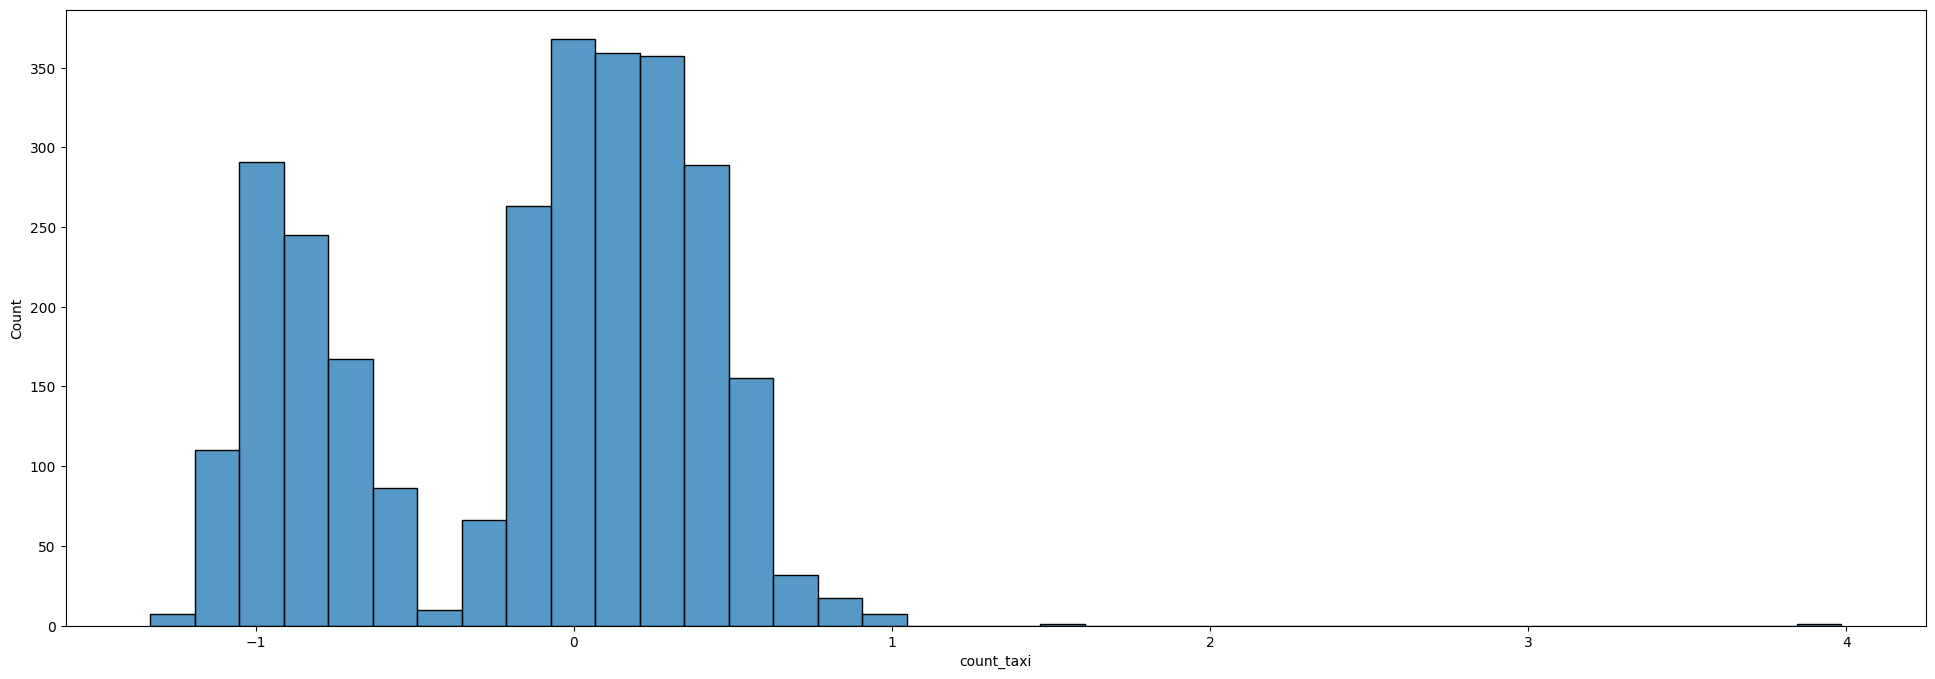

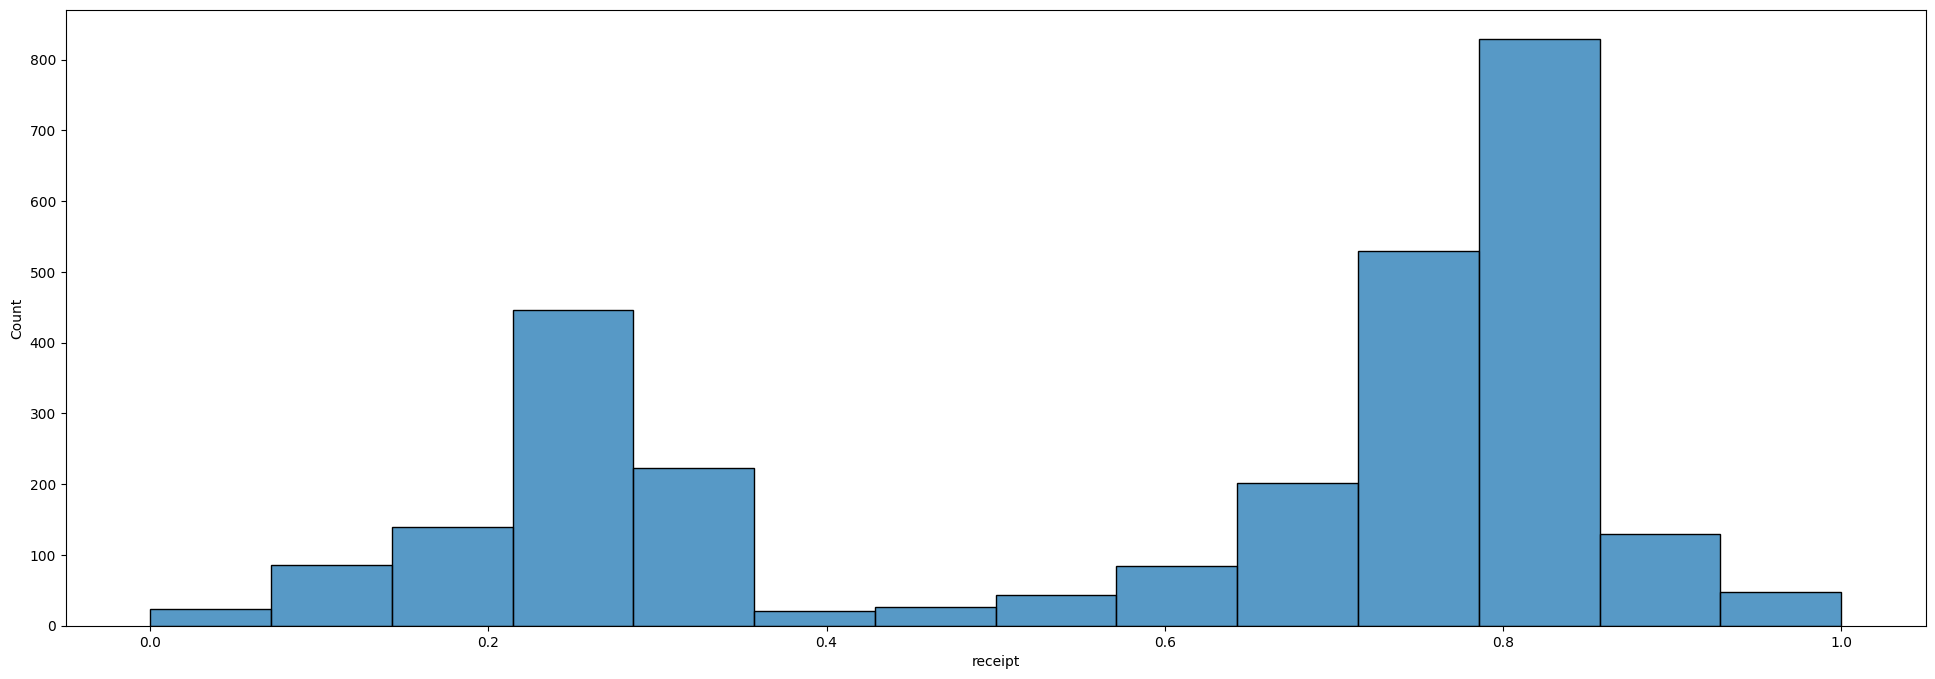

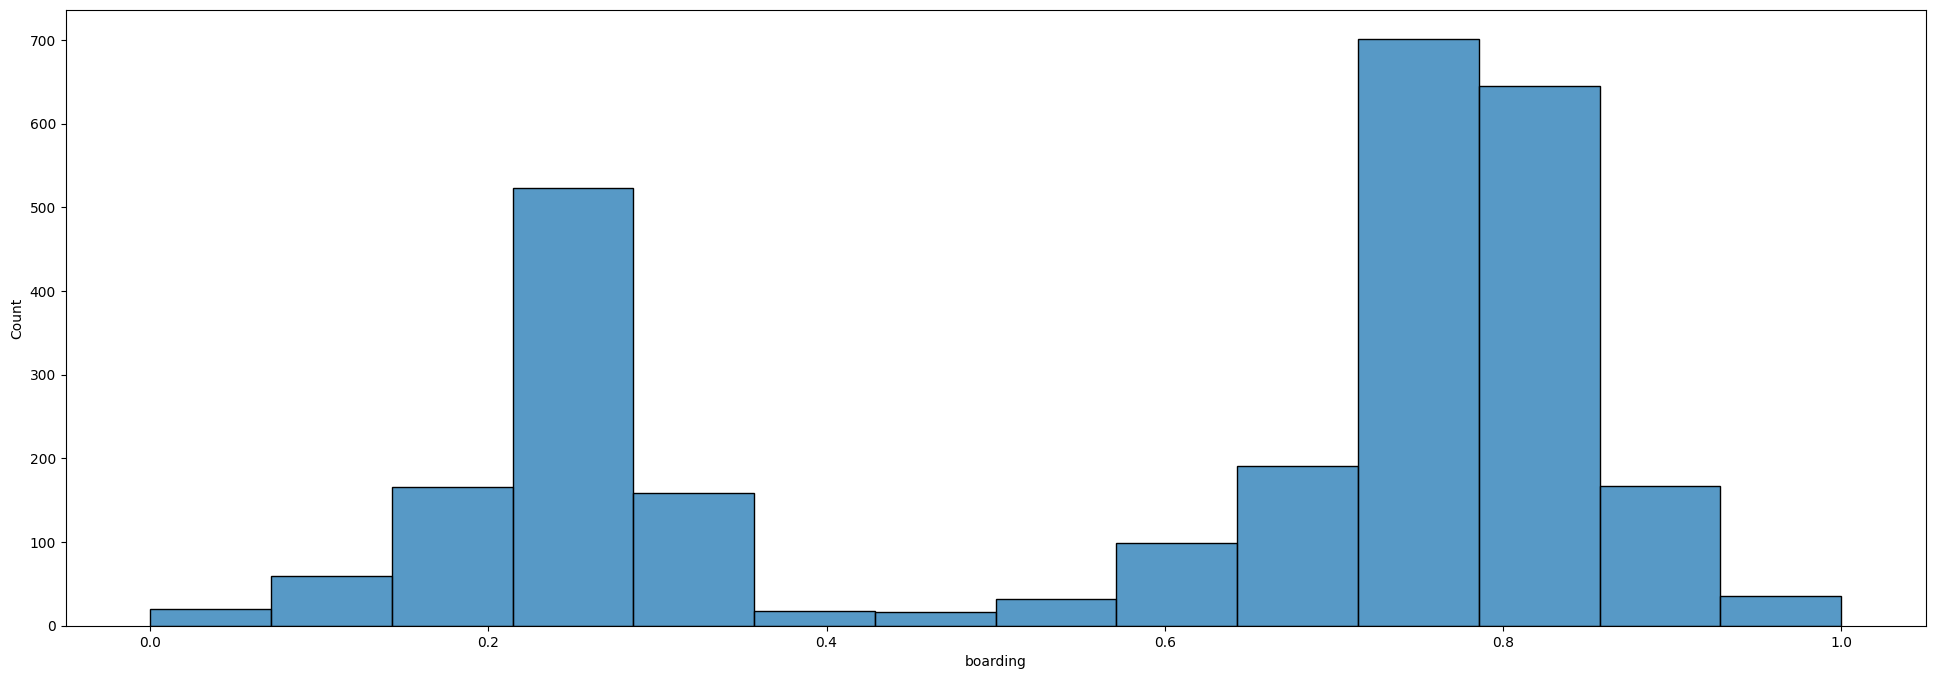

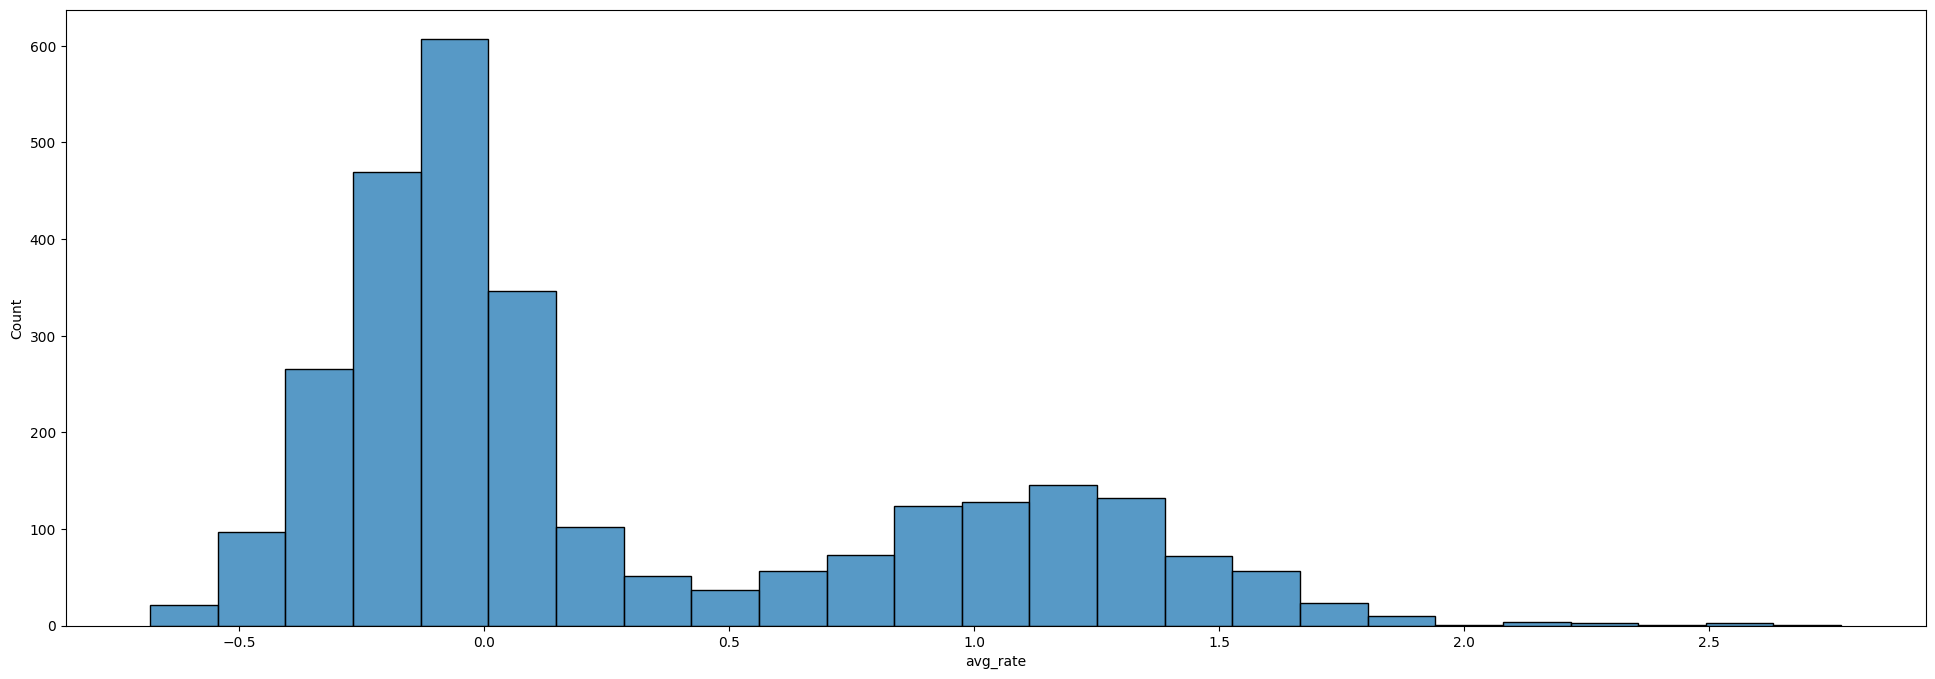

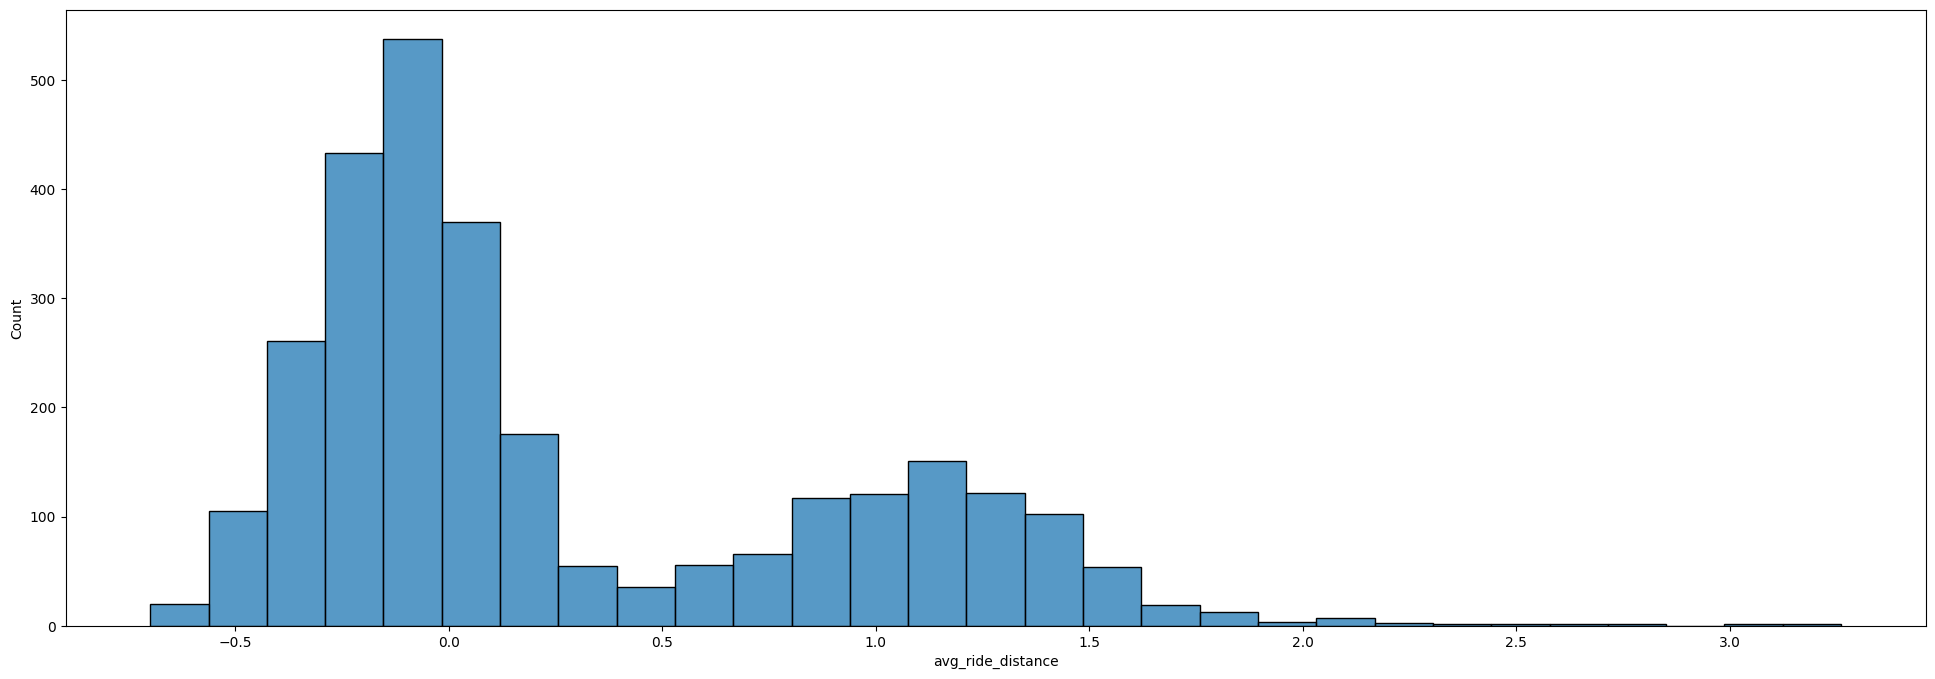

In [39]:
for i in x_train.columns[:5]:
    plt.figure(figsize = (24, 8))
    sns.histplot(data = x_train, x = i)
    plt.show()

## 3.모델링
* **세부요구사항**
    * 머신러닝 알고리즘 중 3가지 이상을 사용하여 모델을 만들고 튜닝을 수행합니다.
    * 성능 측정은 MAE, MAPE로 수행합니다.
    * 모델링 후 실제값과 예측값을 시각화(라인차트)하여 분석합니다.

In [75]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import *

In [42]:
def pred_plot(y_val, pred, date):
    plt.figure(figsize = (18,6))
    sns.lineplot(x=date, y = y_val.values, label = 'actual value', marker = 'o')
    sns.lineplot(x=date, y = pred, label = 'predicted value', marker = 'o')
    plt.ylim(0,60)
    plt.grid()
    plt.show()

### (1) 머신러닝

#### 1) Linear Regression

In [43]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

lr_model = LinearRegression()

lr_model.fit(x_train, y_train)

LinearRegression()

In [44]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

y_pred_lr = lr_model.predict(x_test)

In [59]:
print("MAE : ", mean_absolute_error(y_test, y_pred_lr))
print("MAPE : ", mean_absolute_percentage_error(y_test, y_pred_lr))
print("R2 : ", r2_score(y_test, y_pred_lr))

MAE :  3.797794363052048
MAPE :  0.09573897033045646
R2 :  0.2994788429376072


In [66]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR

#### 2) Lasso Regression

In [67]:
model_lasso = Lasso(alpha=0.1)

# 학습하기
model_lasso.fit(x_train, y_train)

Lasso(alpha=0.1)

In [68]:
# 성능예측
y_pred_lasso = model_lasso.predict(x_test)

# 결과확인
print('MAE:',mean_absolute_error(y_test, y_pred_lasso))
print('MAPE:',mean_absolute_percentage_error(y_test, y_pred_lasso))

MAE: 3.833807742832725
MAPE: 0.09634092257225664


#### 3) Ridge Regression

In [69]:
model_ridge = Ridge(alpha=0.1)

# 학습하기
model_ridge.fit(x_train, y_train)

Ridge(alpha=0.1)

In [71]:
# 성능예측
y_pred_ridge = model_ridge.predict(x_test)

# 결과확인
print('MAE:',mean_absolute_error(y_test, y_pred_ridge))
print('MAPE:',mean_absolute_percentage_error(y_test, y_pred_ridge))

MAE: 3.782220186018708
MAPE: 0.09546036196976797


#### 4) ElasticNet

In [72]:
model_el = ElasticNet(alpha=0.1, l1_ratio=0.5)

# 학습하기
model_el.fit(x_train, y_train)

ElasticNet(alpha=0.1)

In [76]:
# 성능예측
y_pred_el = model_el.predict(x_test)

# 결과확인
print('MAE:',mean_absolute_error(y_test, y_pred_el))
print('MAPE:',mean_absolute_percentage_error(y_test, y_pred_el))

MAE: 3.8780393160222157
MAPE: 0.09765381463020921


#### 5) KNN

In [78]:
model_knn = KNeighborsRegressor()

# 학습하기
model_knn.fit(x_train, y_train)

KNeighborsRegressor()

In [81]:
# 성능예측
y_pred_knn = model_knn.predict(x_test)

# 결과확인
print('MAE:',mean_absolute_error(y_test, y_pred_knn))
print('MAPE:',mean_absolute_percentage_error(y_test, y_pred_knn))

MAE: 4.8791208791208796
MAPE: 0.12170196827529758


#### 6) Decision Tree

In [82]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

model_dt = DecisionTreeRegressor()

# 학습하기
model_dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [83]:
# 성능예측
y_pred_dt = model_dt.predict(x_test)

# 결과확인
print('MAE:',mean_absolute_error(y_test, y_pred_dt))
print('MAPE:',mean_absolute_percentage_error(y_test, y_pred_dt))

MAE: 6.37032967032967
MAPE: 0.15254741587372464


#### 7) Random Forest

In [46]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

rf_model = RandomForestRegressor(random_state = 1)

rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [47]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

y_pred_rf = rf_model.predict(x_test)

In [48]:
print("MAE : ", mean_absolute_error(y_test, y_pred_rf))
print("MAPE : ", mean_absolute_percentage_error(y_test, y_pred_rf))
print("R2 : ", r2_score(y_test, y_pred_rf))

MAE :  4.243846153846154
MAPE :  0.10562785197176355
R2 :  0.1404318786210601


#### 8) LightGBM

In [49]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

lgbm_model = LGBMRegressor(random_state = 1)

lgbm_model.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2099
[LightGBM] [Info] Number of data points in the train set: 2831, number of used features: 17
[LightGBM] [Info] Start training from score 40.202614


LGBMRegressor(random_state=1)

In [50]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

y_pred_lgbm = lgbm_model.predict(x_test)

In [51]:
print("MAE : ", mean_absolute_error(y_test, y_pred_lgbm))
print("MAPE : ", mean_absolute_percentage_error(y_test, y_pred_lgbm))
print("R2 : ", r2_score(y_test, y_pred_lgbm))

MAE :  4.352107837499347
MAPE :  0.1096304273143245
R2 :  0.05200823503833518


#### 9) XGBoost

In [52]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

xgb_model = XGBRegressor(random_state = 1, enable_categorical = True)

xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [53]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

y_pred_xgb = xgb_model.predict(x_test)

In [85]:
print("MAE : ", mean_absolute_error(y_test, y_pred_xgb))
print("MAPE : ", mean_absolute_percentage_error(y_test, y_pred_xgb))
print("R2 : ", r2_score(y_test, y_pred_xgb))

MAE :  4.806456526033171
MAPE :  0.119001730352776
R2 :  -0.12605837327292346


#### 10)  Gradient Boosting

In [86]:
gb_model = GradientBoostingRegressor(random_state = 1)

gb_model.fit(x_train, y_train)

GradientBoostingRegressor(random_state=1)

In [89]:
y_pred_gb = gb_model.predict(x_test)

In [90]:
print("MAE : ", mean_absolute_error(y_test, y_pred_gb))
print("MAPE : ", mean_absolute_percentage_error(y_test, y_pred_gb))
print("R2 : ", r2_score(y_test, y_pred_gb))

MAE :  3.9356045711315697
MAPE :  0.09823707647667537
R2 :  0.24562432945300416


## 3.모델별 비교
* **세부요구사항**
    * 모델링 단계에서 생성한 모든 모델의 성능을 하나로 모아서 비교합니다.
    * 가장 성능이 높은 모델을 선정합니다.

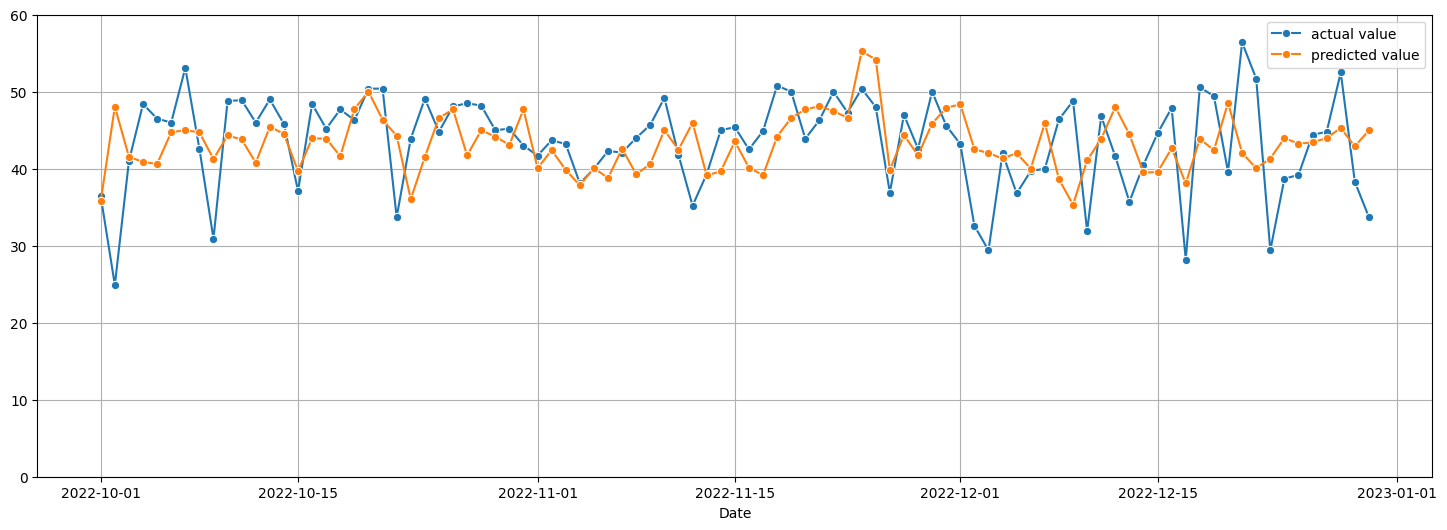

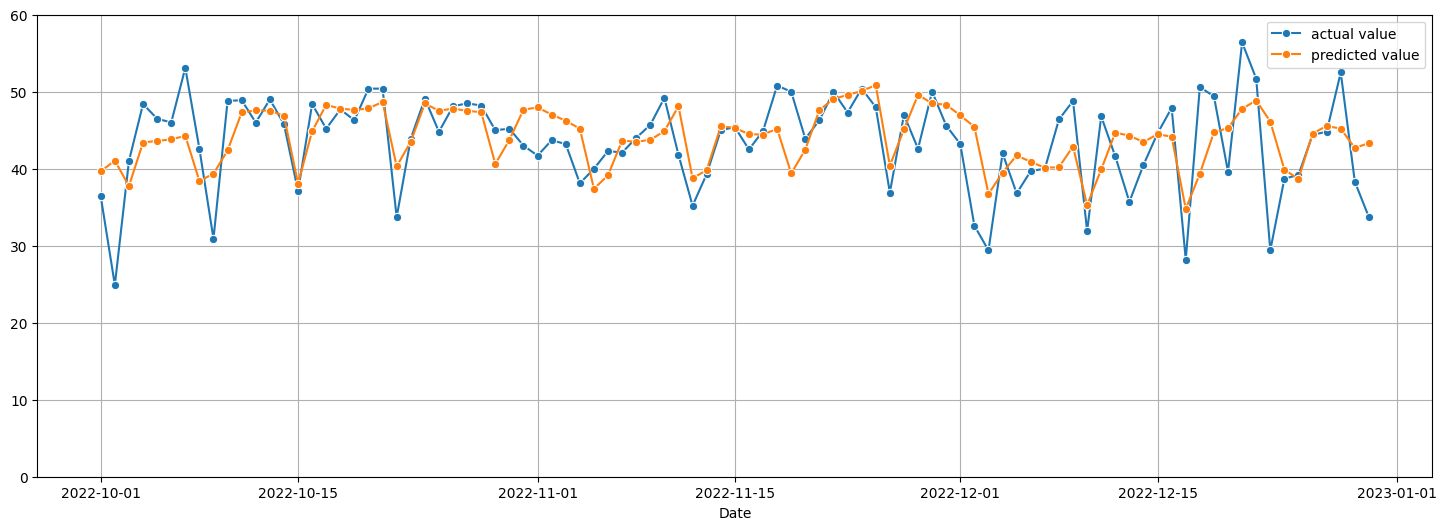

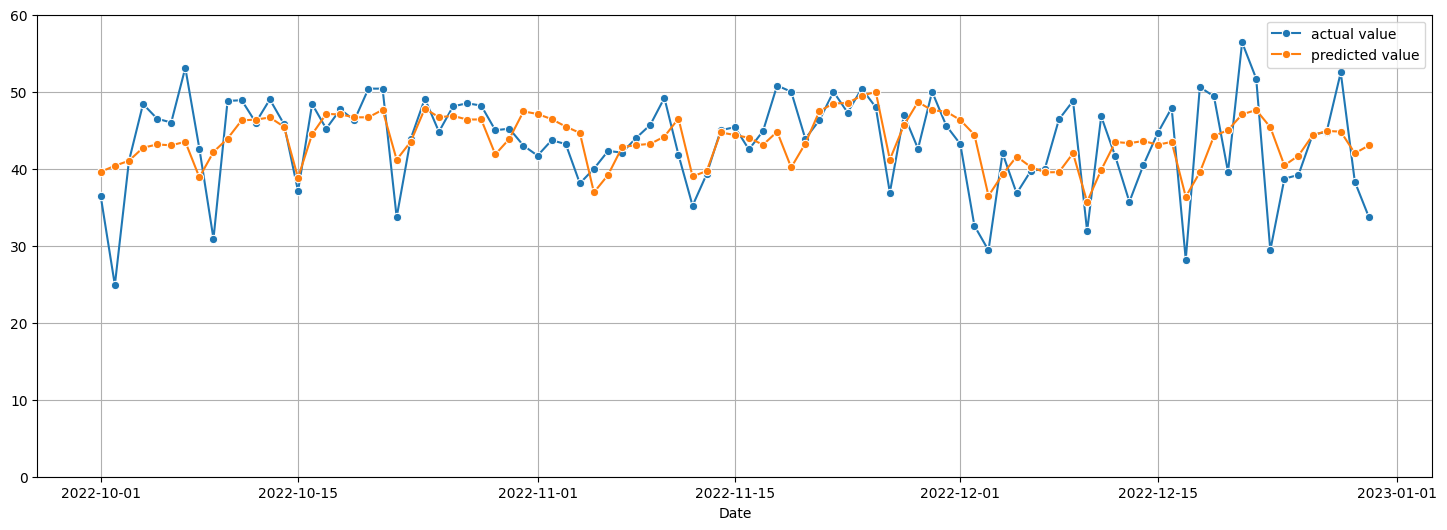

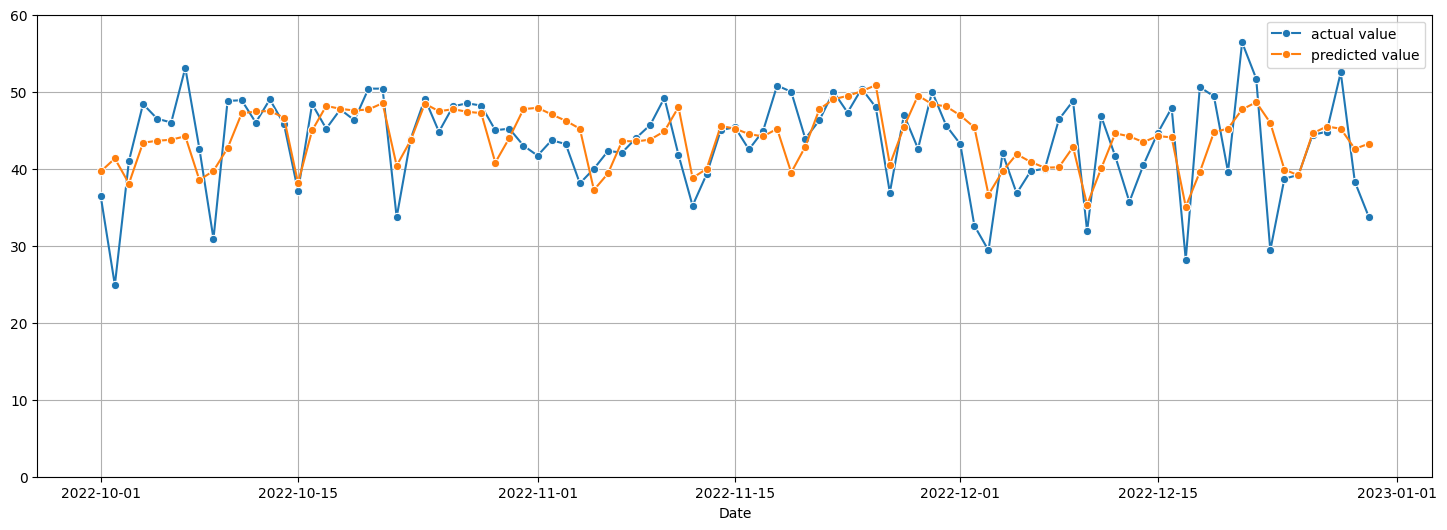

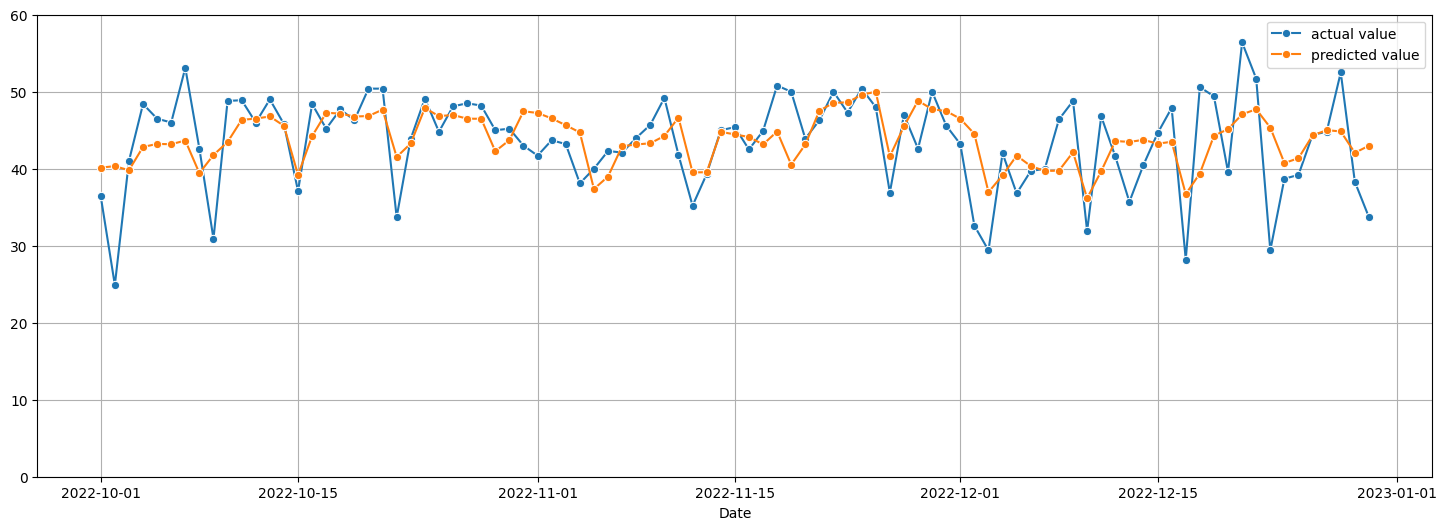

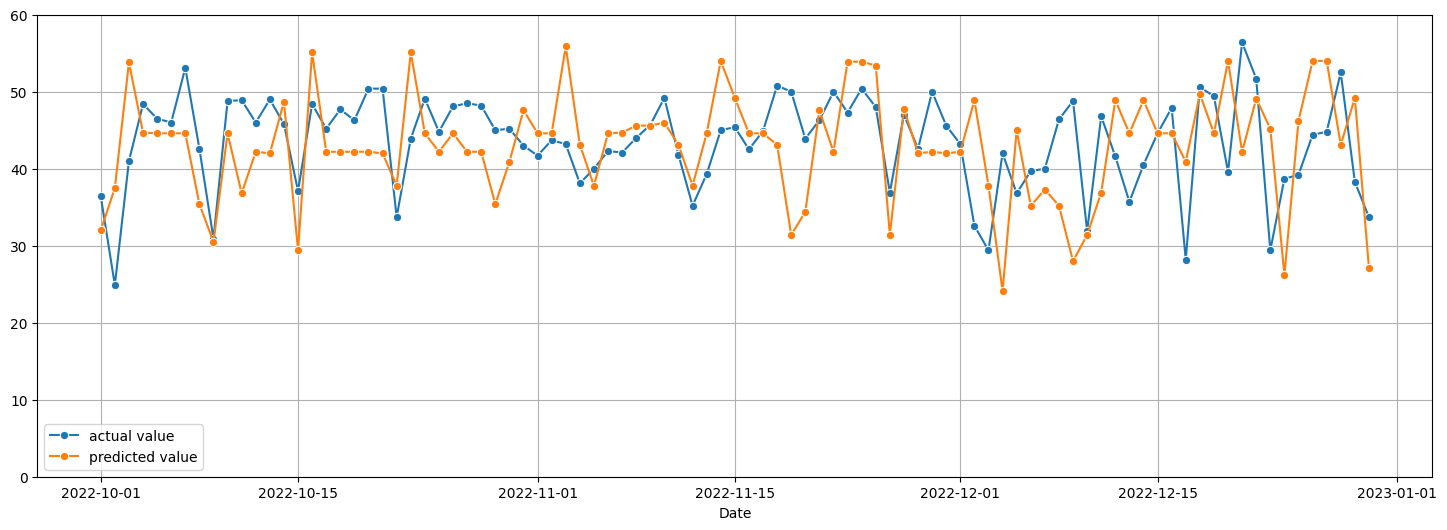

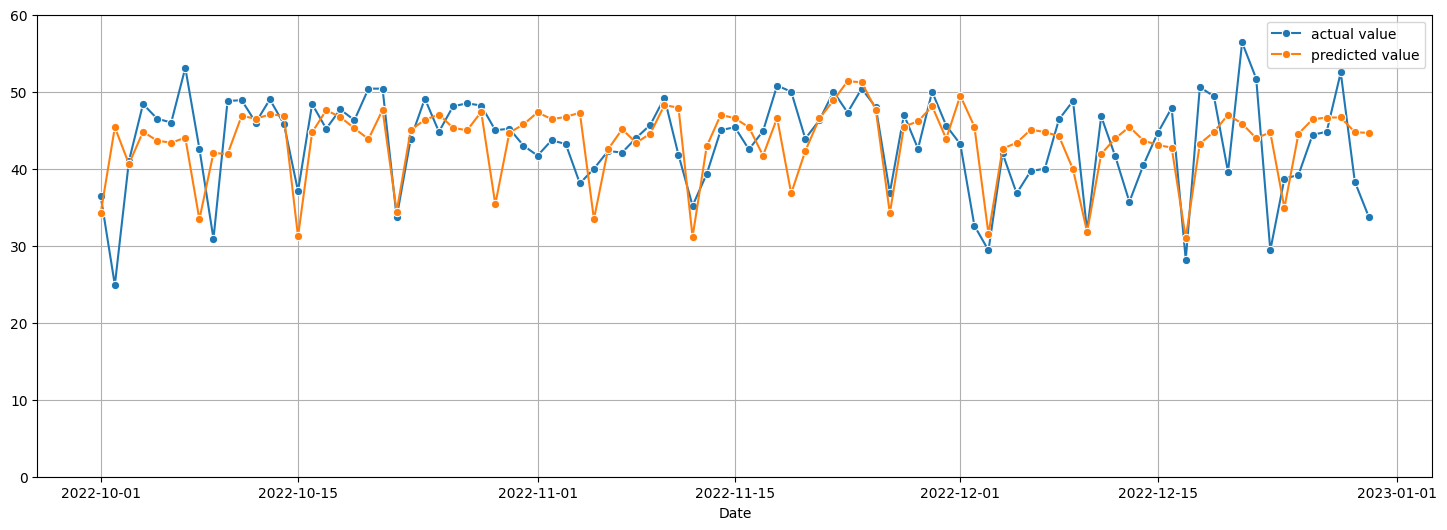

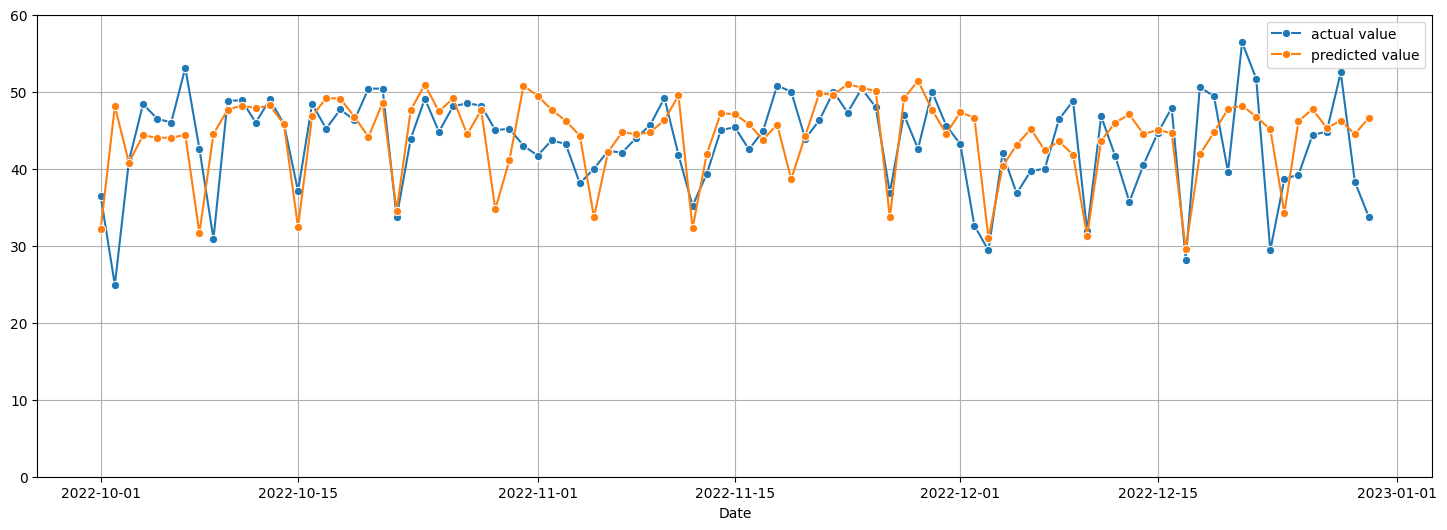

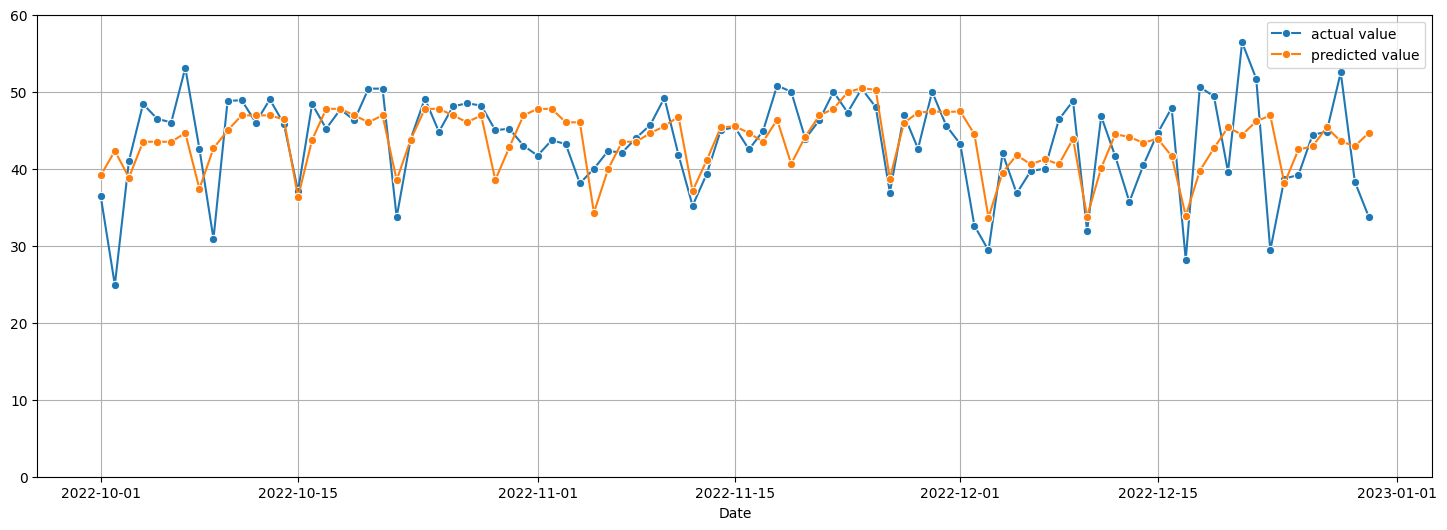

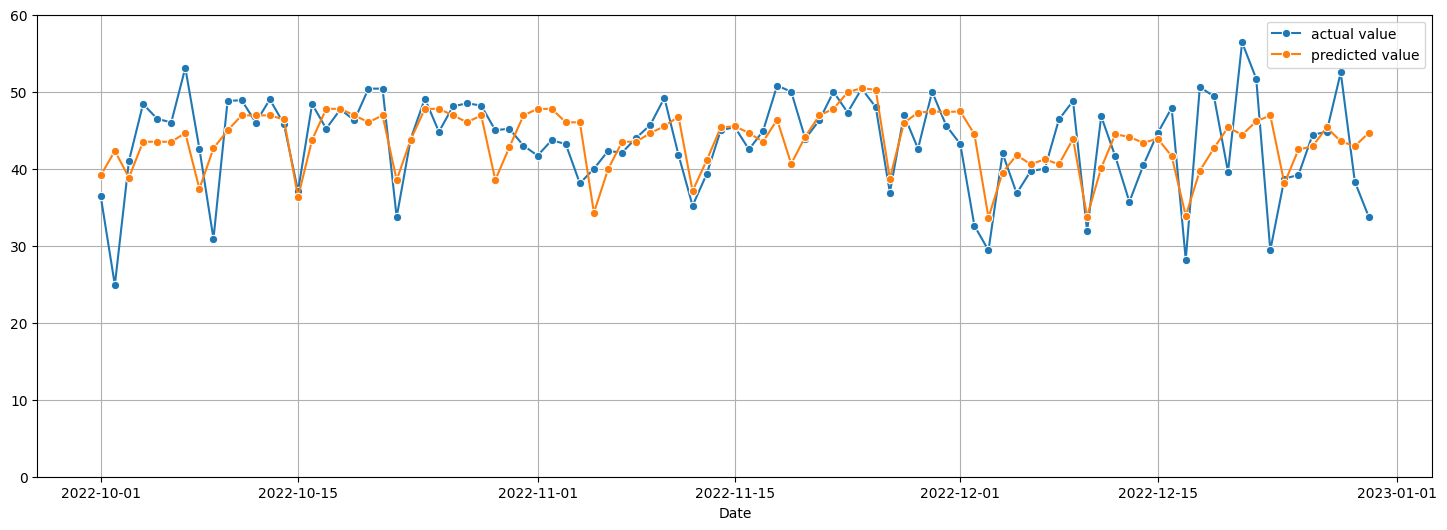

In [94]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

#knn
pred_plot(y_test, y_pred_knn, y_test.index)

#회귀모델
pred_plot(y_test, y_pred_lr, y_test.index)
pred_plot(y_test, y_pred_lasso, y_test.index)
pred_plot(y_test, y_pred_ridge, y_test.index)
pred_plot(y_test, y_pred_el, y_test.index)

#트리기반 모델
pred_plot(y_test, y_pred_dt, y_test.index)
pred_plot(y_test, y_pred_rf, y_test.index)
pred_plot(y_test, y_pred_lgbm, y_test.index)
pred_plot(y_test, y_pred_xgb, y_test.index)
pred_plot(y_test, y_pred_gb, y_test.index)

### 최종 모델

총 10개의 모델을 돌려보니 Ridge 모델의 성능이 가장 좋았다.

In [96]:
model = Ridge(alpha=0.1)

# 학습하기
model.fit(x_train, y_train)

Ridge(alpha=0.1)

In [98]:
# 성능예측
y_pred_ridge = model.predict(x_test)

# 결과확인
print('MAE:',mean_absolute_error(y_test, y_pred_ridge))
print('MAPE:',mean_absolute_percentage_error(y_test, y_pred_ridge))
print('R2:',r2_score(y_test, y_pred_ridge))

MAE: 3.782220186018708
MAPE: 0.09546036196976797
R2: 0.30235441574894983
